# Analyzing mixture of experts activations

Create a directory "outputs" and upload all the csv files you would like to analyze there. You can then run this notebook. Download the output_df.csv after running to notebook to save the cleaned outputs offline.

In [1]:
import csv
import glob
import torch
from torch import tensor, nn
import pandas as pd
from typing import Callable
import sys
import seaborn as sns

RESULTS_PATTERN = "/nethome/abambhaniya3/synergy3/Google-MoE/MoE_Expert_Scheduler/Modelling Notebooks/Dataset-Switch_t_32E_CNN_dailymail/*.csv"
csv.field_size_limit(sys.maxsize)

131072

In [2]:
## Library and inputs
import plotly.express as px
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

import plotnine as p9
from plotnine import ggplot, aes, geom_point, geom_line, labs, element_text

In [3]:
def read_csv(csv_path: str):
    with open(csv_path) as fp:
        reader = csv.reader(fp, delimiter=",", quotechar="\"")
        return [row for row in reader]


def tensor_from_str(tensor_string: str):
    """
    Requires cuda
    """
    ob = eval(tensor_string.replace("\n",""))
    return ob

In [4]:
def parse_row(row: list):

    output_rows = []

    num_gen_tokens = int(row[-3]) + 1

    if len(row) != num_gen_tokens*3 + 1:
        print(f"Encountered row with incorrect number of columns : ({len(row)})")
        raise Exception

    id = row[0]
    for i in range(1,len(row),3):
        current_gen_token = tensor_from_str(row[i])
        output_seq = eval(row[i+2] )

        output_dict = {"id": id, "num_output_tokens": num_gen_tokens, "Generated Token Num":current_gen_token, "sequences": output_seq}
        #Generated Token Number
        for j, val in enumerate(eval(row[i+1])):
            if j % 2 ==0:
                output_dict[f'layer_{j//2}_logits'] = val
            elif j % 2 ==1:
                output_dict[f'layer_{j//2}_expert'] = val
        output_rows.append(output_dict)


    #return ParsedRow(id, num_gen_tokens, output_seq, prefill_router_logits, decode_router_logits)
    return output_rows

## Create raw dataset

In [5]:
RESULTS_PATTERN

'/nethome/abambhaniya3/synergy3/Google-MoE/MoE_Expert_Scheduler/Modelling Notebooks/Dataset-Switch_t_32E_CNN_dailymail/*.csv'

In [6]:
glob.glob(RESULTS_PATTERN)[:1]

['/nethome/abambhaniya3/synergy3/Google-MoE/MoE_Expert_Scheduler/Modelling Notebooks/Dataset-Switch_t_32E_CNN_dailymail/switch_t_base_32E_cnn_dailymail_100_1.csv']

In [7]:
full_df = pd.DataFrame()
for file_path in glob.glob(RESULTS_PATTERN)[:]:
    rows = read_csv(file_path)
    for row in rows:
        print("Parsed {} rows".format(full_df.shape[0]))
        full_df = pd.concat([full_df,pd.DataFrame.from_dict(parse_row(row))]) 




    # if full_df is None:
    #     full_df = incremental_df
    # else:
    #     full_df = pd.concat([full_df, incremental_df])
        # print("Merged rows into dataframe - new size: {}".format(full_df.shape[0]))

Parsed 0 rows
Parsed 43 rows
Parsed 117 rows
Parsed 167 rows
Parsed 220 rows
Parsed 280 rows
Parsed 316 rows
Parsed 392 rows
Parsed 460 rows
Parsed 505 rows
Parsed 537 rows
Parsed 582 rows
Parsed 626 rows
Parsed 671 rows
Parsed 749 rows
Parsed 780 rows
Parsed 846 rows
Parsed 894 rows
Parsed 966 rows
Parsed 1015 rows
Parsed 1066 rows
Parsed 1117 rows
Parsed 1186 rows
Parsed 1240 rows
Parsed 1287 rows
Parsed 1325 rows
Parsed 1384 rows
Parsed 1419 rows
Parsed 1451 rows
Parsed 1485 rows
Parsed 1523 rows
Parsed 1600 rows
Parsed 1663 rows
Parsed 1694 rows
Parsed 1731 rows
Parsed 1776 rows
Parsed 1848 rows
Parsed 1890 rows
Parsed 1951 rows
Parsed 2006 rows
Parsed 2050 rows
Parsed 2080 rows
Parsed 2148 rows
Parsed 2189 rows
Parsed 2252 rows
Parsed 2291 rows
Parsed 2327 rows
Parsed 2364 rows
Parsed 2406 rows
Parsed 2450 rows
Parsed 2491 rows
Parsed 2539 rows
Parsed 2606 rows
Parsed 2658 rows
Parsed 2720 rows
Parsed 2757 rows
Parsed 2796 rows
Parsed 2868 rows
Parsed 2933 rows
Parsed 2996 rows
Pa

In [8]:
full_df

id  num_output_tokens  \
0   f001ec5c4704938247d27a44948eebb37ae98d01                 43   
1   f001ec5c4704938247d27a44948eebb37ae98d01                 43   
2   f001ec5c4704938247d27a44948eebb37ae98d01                 43   
3   f001ec5c4704938247d27a44948eebb37ae98d01                 43   
4   f001ec5c4704938247d27a44948eebb37ae98d01                 43   
..                                       ...                ...   
47  d75cef6cb7025d22eb308d39b5ae29e480902c91                 52   
48  d75cef6cb7025d22eb308d39b5ae29e480902c91                 52   
49  d75cef6cb7025d22eb308d39b5ae29e480902c91                 52   
50  d75cef6cb7025d22eb308d39b5ae29e480902c91                 52   
51  d75cef6cb7025d22eb308d39b5ae29e480902c91                 52   

    Generated Token Num      sequences  \
0                     0      tensor(0)   
1                     1  tensor(32099)   
2                     2      tensor(5)   
3                     3     tensor(41)   
4                     4    tensor(254)   
..                  ...            ...   
47                   47      tensor(6)   
48                   48     tensor(62)   
49                   49     tensor(22)   
50                   50     tensor(60)   
51                   51    tensor(326)   

                                       layer_0_logits layer_0_expert  \
0   [tensor(0.5770), tensor(0.1647), tensor(1.8181...   [tensor(11)]   
1   [tensor(1.0750), tensor(1.0891), tensor(0.6393...    [tensor(1)]   
2   [tensor(0.4857), tensor(1.2122), tensor(0.8361...   [tensor(24)]   
3   [tensor(0.5801), tensor(1.3160), tensor(1.7084...   [tensor(11)]   
4   [tensor(0.6474), tensor(0.9938), tensor(0.0382...   [tensor(16)]   
..                                                ...            ...   
47  [tensor(0.0908), tensor(0.3498), tensor(0.6925...    [tensor(7)]   
48  [tensor(0.1293), tensor(0.6290), tensor(1.0189...   [tensor(16)]   
49  [tensor(0.6375), tensor(0.7818), tensor(0.7847...   [tensor(12)]   
50  [tensor(0.5047), tensor(0.8332), tensor(0.9296...   [tensor(17)]   
51  [tensor(0.5050), tensor(0.8043), tensor(1.2238...    [tensor(9)]   

                                       layer_1_logits layer_1_expert  \
0   [tensor(6.8496), tensor(3.7458), tensor(0.2629...   [tensor(13)]   
1   [tensor(1.1964), tensor(-0.8084), tensor(-0.96...   [tensor(11)]   
2   [tensor(2.9692), tensor(-0.9402), tensor(-1.43...   [tensor(24)]   
3   [tensor(-0.8309), tensor(0.3507), tensor(-2.72...    [tensor(8)]   
4   [tensor(-0.7830), tensor(1.4480), tensor(-3.47...   [tensor(31)]   
..                                                ...            ...   
47  [tensor(2.5686), tensor(-1.0084), tensor(-0.81...   [tensor(21)]   
48  [tensor(1.3861), tensor(2.9760), tensor(-1.170...   [tensor(17)]   
49  [tensor(3.1612), tensor(-0.4181), tensor(0.820...   [tensor(17)]   
50  [tensor(2.9562), tensor(0.5580), tensor(0.7300...   [tensor(16)]   
51  [tensor(2.6838), tensor(0.4888), tensor(-1.622...    [tensor(9)]   

                                       layer_2_logits layer_2_expert  \
0   [tensor(-2.5249), tensor(-1.3921), tensor(-25....   [tensor(16)]   
1   [tensor(-2.1150), tensor(0.1293), tensor(-8.11...   [tensor(22)]   
2   [tensor(-5.1011), tensor(-0.0104), tensor(30.7...    [tensor(2)]   
3   [tensor(-4.1353), tensor(-1.9603), tensor(-13....   [tensor(31)]   
4   [tensor(-3.7873), tensor(-0.1764), tensor(-24....    [tensor(5)]   
..                                                ...            ...   
47  [tensor(-0.6026), tensor(0.8824), tensor(-14.2...   [tensor(31)]   
48  [tensor(-3.0772), tensor(3.0714), tensor(-29.6...   [tensor(27)]   
49  [tensor(-4.1319), tensor(3.0631), tensor(-40.0...   [tensor(21)]   
50  [tensor(0.0232), tensor(3.8757), tensor(-27.07...   [tensor(29)]   
51  [tensor(5.7717), tensor(0.8677), tensor(-35.08...   [tensor(19)]   

                                       layer_3_logits layer_3_expert  \
0   [tensor(26.1820), tensor(5.3099), tensor(11.53...   [tensor(2

In [9]:
full_df.columns

Index(['id', 'num_output_tokens', 'Generated Token Num', 'sequences',
       'layer_0_logits', 'layer_0_expert', 'layer_1_logits', 'layer_1_expert',
       'layer_2_logits', 'layer_2_expert', 'layer_3_logits', 'layer_3_expert',
       'layer_4_logits', 'layer_4_expert', 'layer_5_logits', 'layer_5_expert'],
      dtype='object')

In [10]:
# Assuming your original DataFrame is named df
df_router_logits = pd.DataFrame()
# Create a new DataFrame with 12 columns
for i in range(6):
    new_columns = []
    for j in range(32):
        new_columns.append(f'Layer_{i}_expert_{j}')
    new_df = full_df[f'layer_{i}_logits'].apply(pd.Series)
    new_df.columns = new_columns

    # print(new_df)
    df_router_logits = pd.concat([df_router_logits, new_df], axis = 1)

# Display the new DataFrame
display(df_router_logits)


Layer_0_expert_0  Layer_0_expert_1  Layer_0_expert_2  Layer_0_expert_3  \
0             0.5770            0.1647            1.8181            0.7679   
1             1.0750            1.0891            0.6393           -0.9760   
2             0.4857            1.2122            0.8361           -1.0925   
3             0.5801            1.3160            1.7084            0.0177   
4             0.6474            0.9938            0.0382           -0.8350   
..               ...               ...               ...               ...   
47            0.0908            0.3498            0.6925           -1.0529   
48            0.1293            0.6290            1.0189           -0.1602   
49            0.6375            0.7818            0.7847            0.3058   
50            0.5047            0.8332            0.9296            0.3724   
51            0.5050            0.8043            1.2238           -1.6615   

    Layer_0_expert_4  Layer_0_expert_5  Layer_0_expert_6  Layer_0_expert_7  \
0            -1.0883           -0.6067           -3.2795           -3.0298   
1             0.4585           -1.7404            0.3299           -2.7483   
2            -0.6158           -3.2056           -0.9702           -2.8043   
3            -0.4801           -4.6985           -1.7977           -1.8499   
4            -0.0077           -5.3167           -2.1439           -5.2511   
..               ...               ...               ...               ...   
47           -0.0995           -2.9576           -0.7797            1.7129   
48           -0.9959           -4.6028           -1.7702           -3.7432   
49           -1.5390           -3.3042           -1.9848           -3.4225   
50            0.4148           -3.5482           -2.3384           -5.0306   
51           -2.3752           -0.8003           -0.1367           -5.6977   

    Layer_0_expert_8  Layer_0_expert_9  ...  Layer_5_expert_22  \
0             0.9483           -3.8578  ...        -167.760803   
1             0.3887            0.4189  ...          39.577202   
2             0.0589            1.1517  ...          12.148100   
3             0.8021           -0.2799  ...          -1.588300   
4             1.3653            1.0963  ...          44.661999   
..               ...               ...  ...                ...   
47           -0.2855            0.4028  ...          -5.696000   
48            1.1156            0.1118  ...          14.872900   
49            0.1309            0.9605  ...          27.697201   
50            0.2205           -1.0909  ...          11.518200   
51           -0.4800            3.5497  ...          59.406200   

    Layer_5_expert_23  Layer_5_expert_24  Layer_5_expert_25  \
0           -0.841900          24.882200         272.486786   
1            3.974200         -54.127102          21.126200   
2            0.630900         -38.485199           3.907900   
3          -31.750000         -41.785000          38.063999   
4           21.159000          60.041000         -36.936001   
..                ...                ...                ...   
47         -37.278000          -0.031066         -19.028000   
48         -47.340099          83.414101         -13.860000   
49         -43.106701          37.354401          90.056000   
50         -59.893902         186.672607          13.981700   
51          -7.540100         -57.536900          10.819700   

    Layer_5_expert_26  Layer_5_expert_27  Layer_5_expert_28  \
0          140.493301         223.145004         110.084396   
1           12.670400         -97.938301         -11.777300   
2           -2.559200         -62.654701          17.626200   
3           -6.591400         -90.656998          28.422001   
4          -80.686996         -49.494999          56.902000   
..                ...                ...                ...   
47         -23.444000         -21.788000         -44.915001   
48         -37.937000         151.010498         -44.618599   
49         -5

<Axes: >

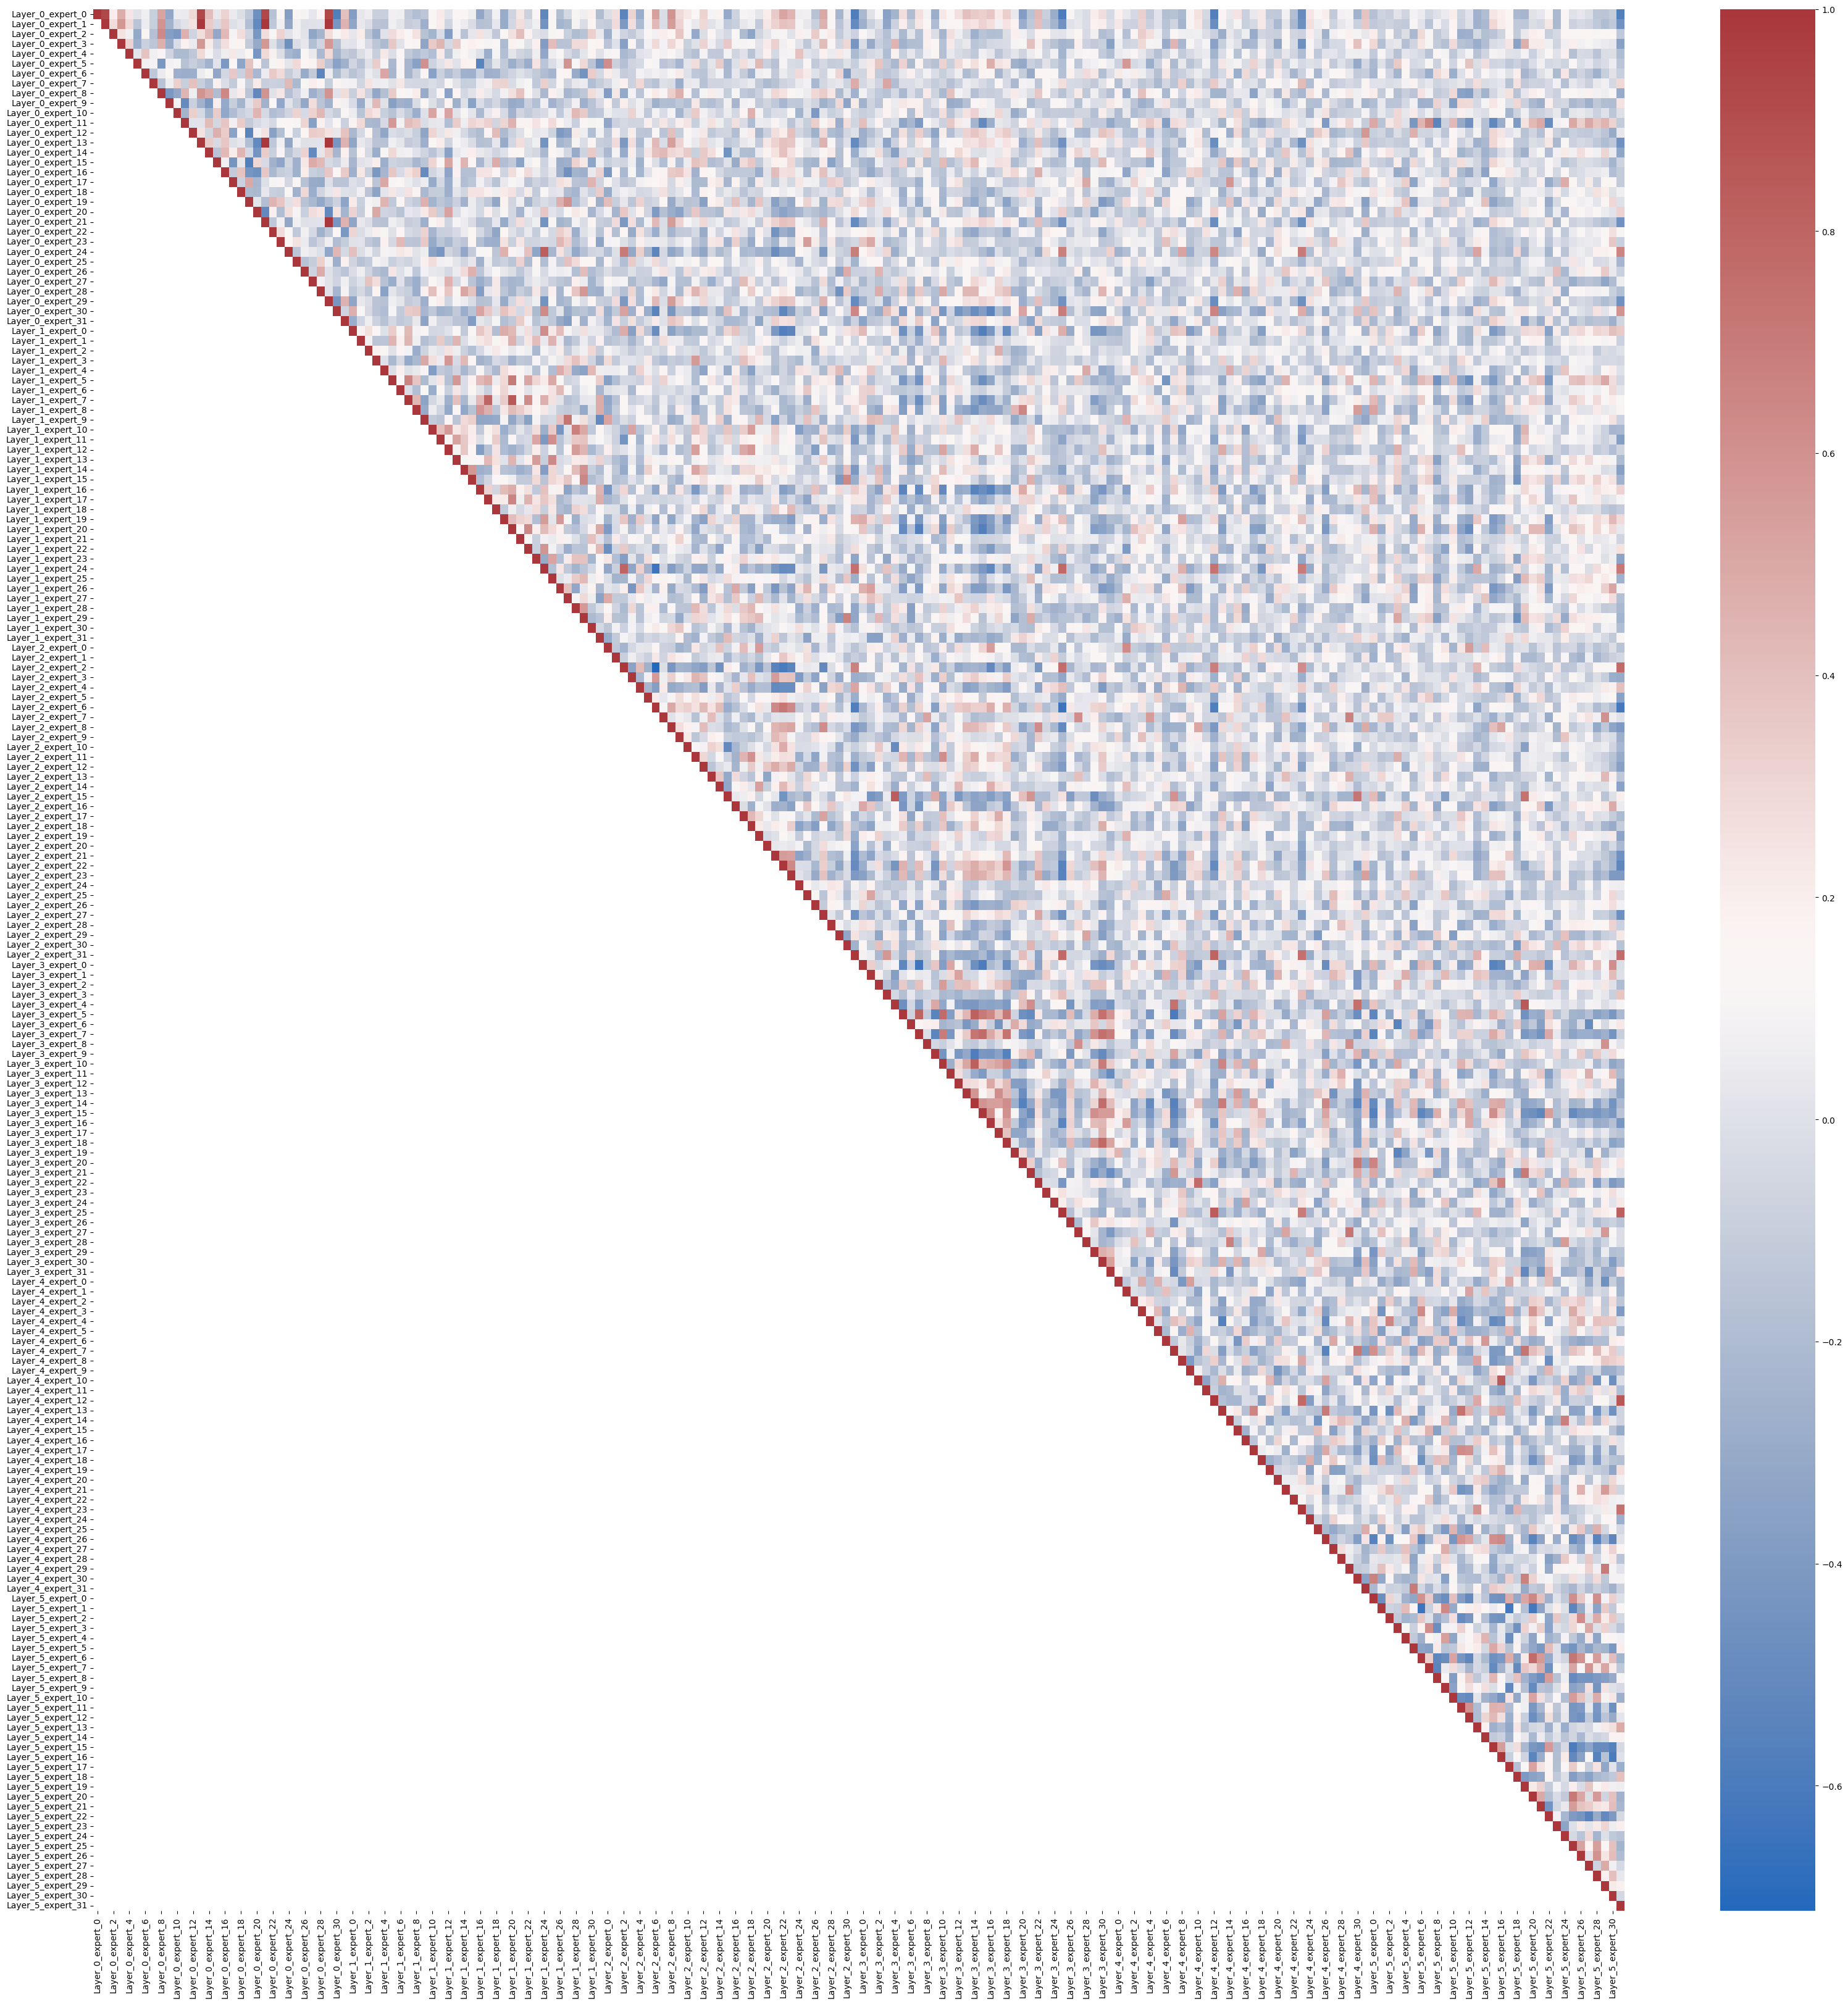

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(40, 40))
expert_logit_corr = df_router_logits.corr()

expert_logit_corr = expert_logit_corr.where(np.triu(np.ones(expert_logit_corr.shape)).astype(bool))

sns.heatmap(expert_logit_corr, cmap='vlag')

In [12]:
full_df.columns

Index(['id', 'num_output_tokens', 'Generated Token Num', 'sequences',
       'layer_0_logits', 'layer_0_expert', 'layer_1_logits', 'layer_1_expert',
       'layer_2_logits', 'layer_2_expert', 'layer_3_logits', 'layer_3_expert',
       'layer_4_logits', 'layer_4_expert', 'layer_5_logits', 'layer_5_expert'],
      dtype='object')

## Top K Expert Selected

In [107]:
def get_top_k_expert_indices(df, k=2):
  """
  This function efficiently extracts the indices of the top 2 values within
  each list in a DataFrame column containing torch tensors.

  Args:
      df (pandas.DataFrame): The DataFrame containing the column with lists of tensors.
      layer_0_logits_col (str, optional): The name of the column containing the lists of tensors.
          Defaults to 'layer_0_logits'.

  Returns:
      pandas.DataFrame: A new DataFrame with a column named 'layer_0_expert' containing lists
          of the indices of the top 2 values in each original list.
  """
  for cols in df.columns:
    if 'logits' in cols:
        df[cols.replace('logits','topk_experts')] = df[cols].apply(lambda x: torch.topk(x, k)[1].tolist())
  return df

# Example usage:
# Assuming your DataFrame is named 'data' and has the column 'layer_0_logits'
get_top_k_expert_indices(full_df, k=2)


id  num_output_tokens  \
0   f001ec5c4704938247d27a44948eebb37ae98d01                 43   
1   f001ec5c4704938247d27a44948eebb37ae98d01                 43   
2   f001ec5c4704938247d27a44948eebb37ae98d01                 43   
3   f001ec5c4704938247d27a44948eebb37ae98d01                 43   
4   f001ec5c4704938247d27a44948eebb37ae98d01                 43   
..                                       ...                ...   
44  5c3e16c415b463269527cafd220170e1303048f8                 49   
45  5c3e16c415b463269527cafd220170e1303048f8                 49   
46  5c3e16c415b463269527cafd220170e1303048f8                 49   
47  5c3e16c415b463269527cafd220170e1303048f8                 49   
48  5c3e16c415b463269527cafd220170e1303048f8                 49   

    Generated Token Num      sequences  \
0                     0      tensor(0)   
1                     1  tensor(32099)   
2                     2      tensor(5)   
3                     3     tensor(41)   
4                     4    tensor(254)   
..                  ...            ...   
44                   44  tensor(10213)   
45                   45      tensor(5)   
46                   46    tensor(287)   
47                   47      tensor(5)   
48                   48     tensor(96)   

                                       layer_0_logits layer_0_expert  \
0   [tensor(0.5770), tensor(0.1647), tensor(1.8181...   [tensor(11)]   
1   [tensor(1.0750), tensor(1.0891), tensor(0.6393...    [tensor(1)]   
2   [tensor(0.4857), tensor(1.2122), tensor(0.8361...   [tensor(24)]   
3   [tensor(0.5801), tensor(1.3160), tensor(1.7084...   [tensor(11)]   
4   [tensor(0.6474), tensor(0.9938), tensor(0.0382...   [tensor(16)]   
..                                                ...            ...   
44  [tensor(1.8799), tensor(1.8414), tensor(1.5696...   [tensor(12)]   
45  [tensor(0.0260), tensor(0.7324), tensor(0.5165...   [tensor(24)]   
46  [tensor(0.6600), tensor(0.8420), tensor(0.7536...    [tensor(9)]   
47  [tensor(0.0386), tensor(0.7539), tensor(0.6553...   [tensor(24)]   
48  [tensor(0.6136), tensor(0.8217), tensor(0.9281...   [tensor(16)]   

                                       layer_1_logits layer_1_expert  \
0   [tensor(6.8496), tensor(3.7458), tensor(0.2629...   [tensor(13)]   
1   [tensor(1.1964), tensor(-0.8084), tensor(-0.96...   [tensor(11)]   
2   [tensor(2.9692), tensor(-0.9402), tensor(-1.43...   [tensor(24)]   
3   [tensor(-0.8309), tensor(0.3507), tensor(-2.72...    [tensor(8)]   
4   [tensor(-0.7830), tensor(1.4480), tensor(-3.47...   [tensor(31)]   
..                                                ...            ...   
44  [tensor(-0.2311), tensor(2.0302), tensor(-0.34...   [tensor(25)]   
45  [tensor(4.1672), tensor(1.2765), tensor(-1.659...   [tensor(24)]   
46  [tensor(-2.9299), tensor(0.4411), tensor(-3.14...   [tensor(18)]   
47  [tensor(3.8154), tensor(0.6318), tensor(-1.124...   [tensor(24)]   
48  [tensor(1.3497), tensor(0.4932), tensor(-2.243...    [tensor(8)]   

                                       layer_2_logits layer_2_expert  ...  \
0   [tensor(-2.5249), tensor(-1.3921), tensor(-25....   [tensor(16)]  ...   
1   [tensor(-2.1150), tensor(0.1293), tensor(-8.11...   [tensor(22)]  ...   
2   [tensor(-5.1011), tensor(-0.0104), tensor(30.7...    [tensor(2)]  ...   
3   [tensor(-4.1353), tensor(-1.9603), tensor(-13....   [tensor(31)]  ...   
4   [tensor(-3.7873), tensor(-0.1764), tensor(-24....    [tensor(5)]  ...   
..                                                ...            ...  ...   
44  [tensor(-3.7948), tensor(3.4275), tensor(-29.6...    [tensor(8)]  ...   
45  [tensor(-6.4050), tensor(0.4067), tensor(24.62...    [tensor(2)]  ...   
46  [tensor(-5.1157), tensor(3.6595), tensor(-38.4...   [tensor(21)]  ...   
47  [tensor(-4.7793), tensor(1.3249), tensor(31.24...    [tensor(2)]  ...   
48  [tensor(-2.0179), tensor(-0.3189), tensor(-14....   [tensor(31)]  ...   

                                       layer_4_logits layer_4_expert  \
0   [

In [108]:
top_experts_selected = full_df[['id', 'num_output_tokens', 'Generated Token Num', 'sequences', 'layer_0_topk_experts', 'layer_1_topk_experts', 'layer_2_topk_experts', 'layer_3_topk_experts', 'layer_4_topk_experts', 'layer_5_topk_experts']]

## Increasing Batch size

In [109]:
num_samples = len(full_df) // 20
# num_samples = 1

data = []
num_expert_layers = 6
for batch_size in [1,2,3,4,6,8,12,16,32]:
    samplewise_experts_activated = []
    for _ in range(num_samples):
        each_sample_exp_activated_list = []
        for E in range(num_expert_layers):
            num_unique_experts = top_experts_selected.sample(n=batch_size).explode([f'layer_{E}_topk_experts'])[f'layer_{E}_topk_experts'].nunique()
            each_sample_exp_activated_list.append(num_unique_experts)
        samplewise_experts_activated.append(each_sample_exp_activated_list)
    data.append([batch_size] + np.mean(samplewise_experts_activated, axis=0).tolist())

In [110]:
batch_wise_experts_activated = pd.DataFrame(data, columns=['Batch', 'Layer 0', 'Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5'])
plot_df = batch_wise_experts_activated.melt(id_vars=['Batch'], var_name='Layer Num', value_name='Experts_Activated')


In [115]:
batch_wise_experts_activated

Batch    Layer 0    Layer 1    Layer 2    Layer 3    Layer 4    Layer 5
0      1   2.000000   2.000000   2.000000   2.000000   2.000000   2.000000
1      2   3.761168   3.667526   3.678694   3.716495   3.728522   3.758591
2      3   5.310137   5.149485   5.083333   5.225086   5.207045   5.346220
3      4   6.628007   6.410653   6.316151   6.521478   6.518900   6.778351
4      6   9.169244   8.497423   8.355670   8.719072   8.698454   9.205326
5      8  11.086770  10.172680  10.045533  10.487113  10.527491  11.181271
6     12  14.217354  12.915808  12.719931  13.420962  13.296392  14.479381
7     16  16.524914  14.959622  14.670103  15.530069  15.487113  16.858247
8     32  22.307560  19.857388  19.959622  21.106529  21.079897  22.765464
9     64  27.343643  24.975086  24.832474  26.047251  26.400344  27.546392

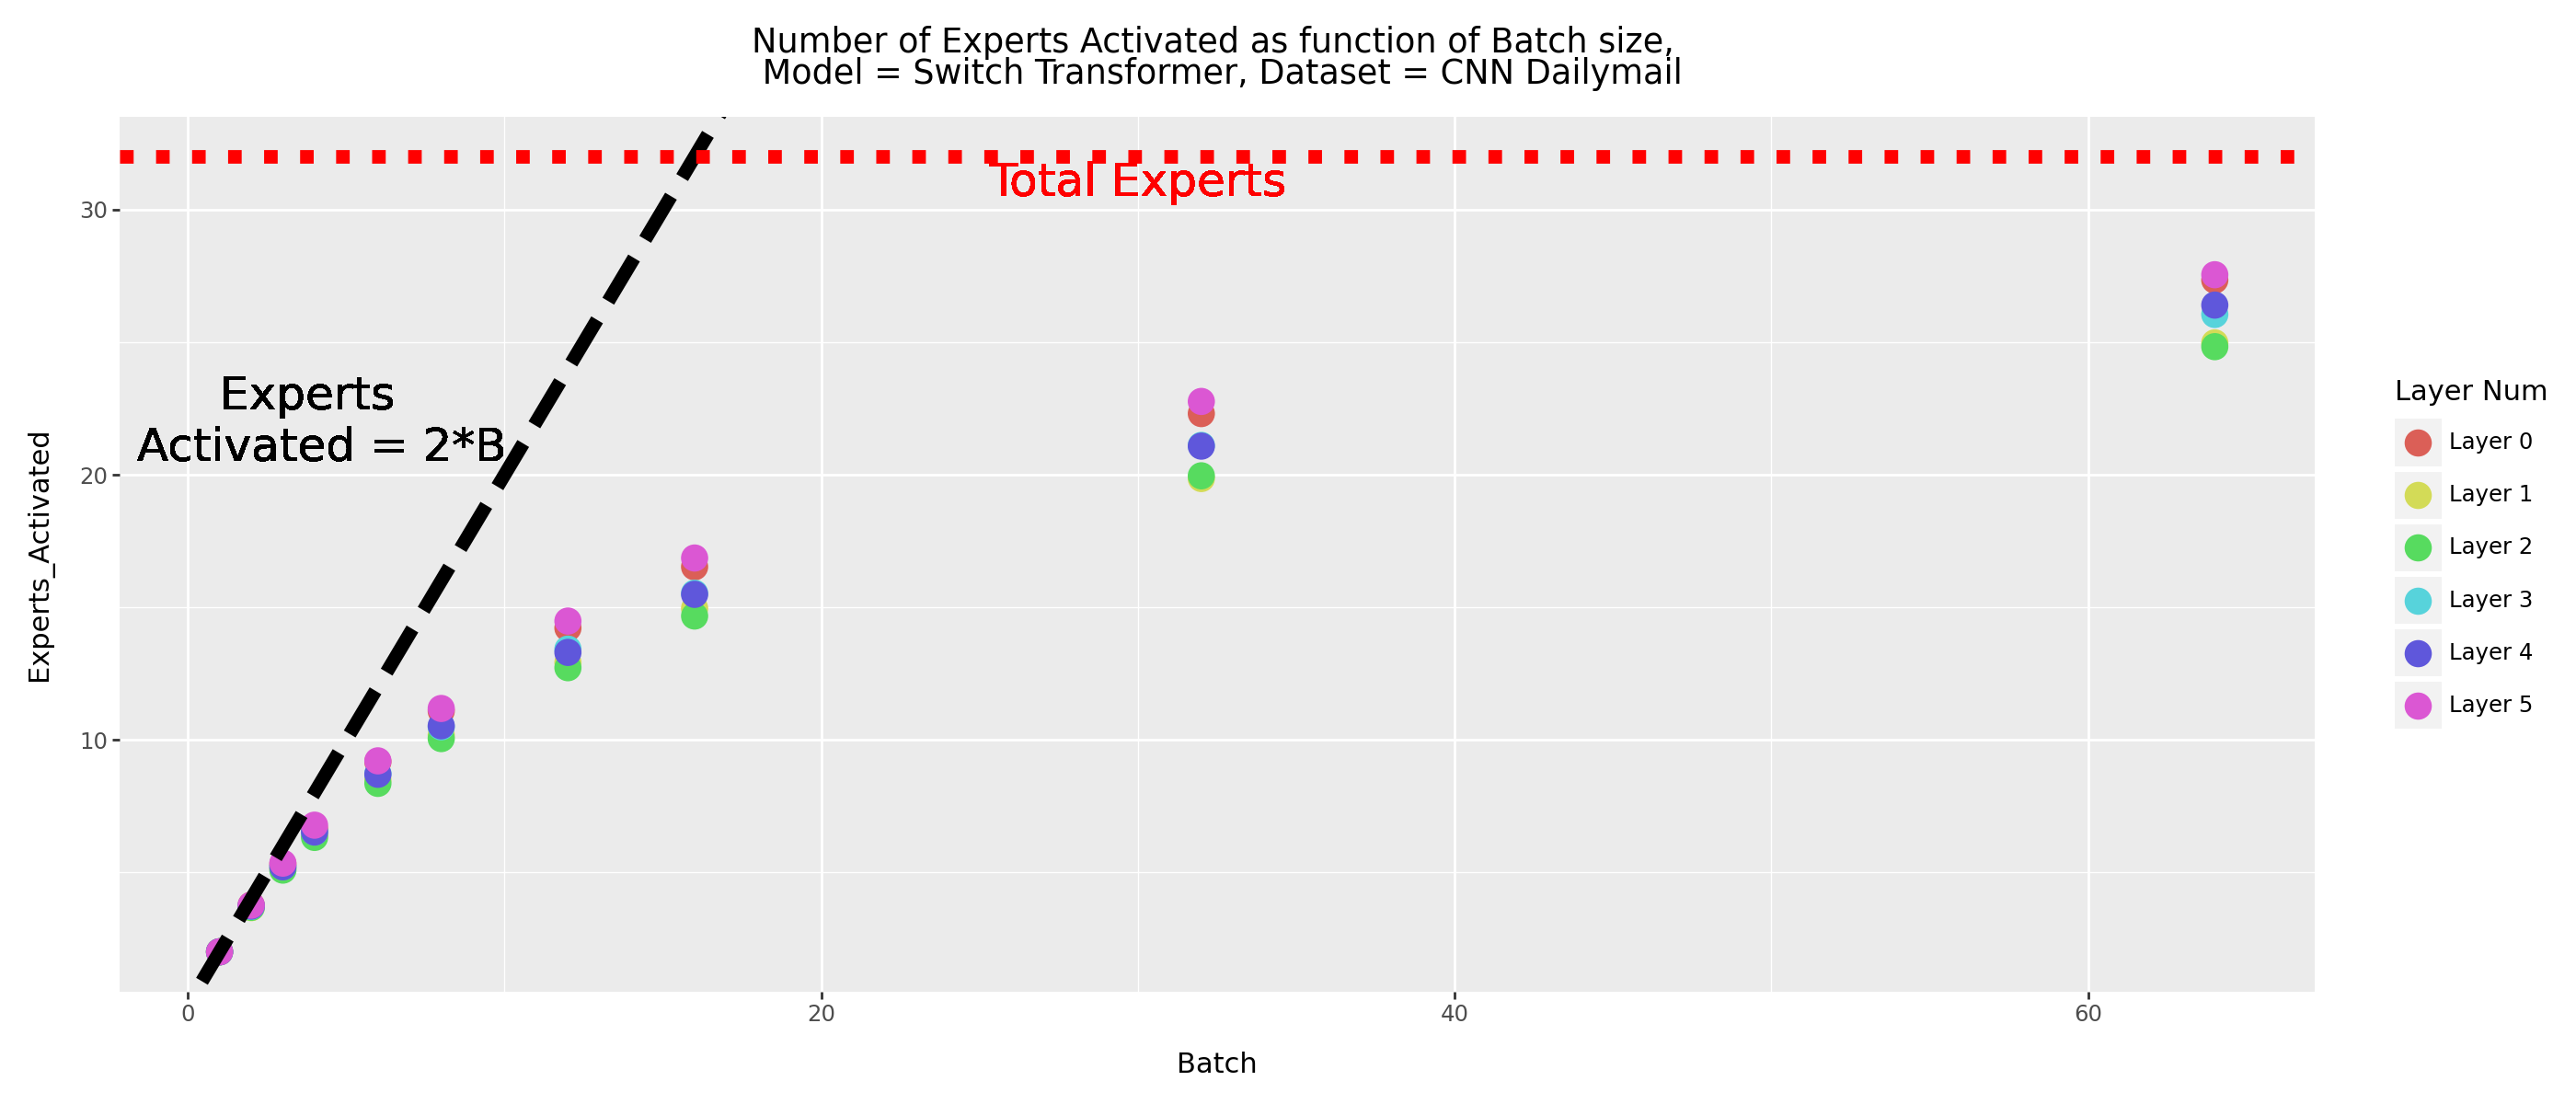

/nethome/abambhaniya3/.conda/envs/moe_scheduler/lib/python3.12/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 14 x 6 in image.
/nethome/abambhaniya3/.conda/envs/moe_scheduler/lib/python3.12/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ./experts_activated_vs_batch.png


In [130]:
# data_df = pd.DataFrame(data, columns = ['Beam_merge','Batch', 'Latency(s)', 'Tokens/s', "Runtime breakdown"])
p1 = (
    p9.ggplot(plot_df, p9.aes(x='Batch', y='Experts_Activated'))
    + p9.labs(title='Number of Experts Activated as function of Batch size,\n Model = Switch Transformer, Dataset = CNN Dailymail')
    + p9.geom_point(p9.aes(color='Layer Num'), size=5) # line plot
    + p9.geom_line(p9.aes(x=np.linspace(1, 32, 100), y = ))
    + p9.theme(figure_size=(14, 6))
    + p9.geom_abline(intercept=0,  # set the y-intercept value
                     slope=2,  # set the slope value
                     size = 3, linetype='dashed')
    + p9.geom_text(x=4, y = 22, label='Experts \n Activated = 2*B',size = 18)
    + p9.geom_hline(yintercept=32,  color='red',
                     size = 3, linetype='dotted')
    + p9.geom_text(x=30, y = 31,  color='red',size = 18, label='Total Experts')
   #  + p9.facet_wrap("Layer Num", scales = 'free', ncol=6)
)
p1.show()
p9.ggsave(p1, './experts_activated_vs_batch.png', dpi=500)

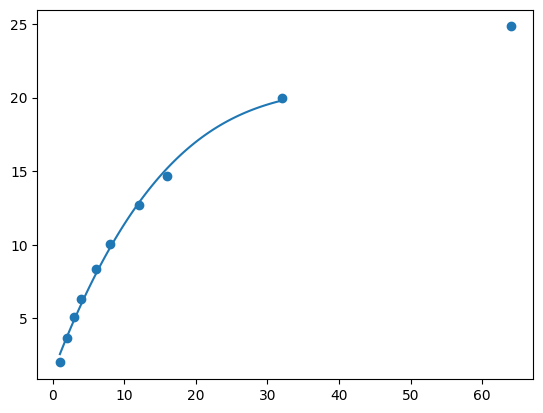

In [135]:
import numpy
import matplotlib.pyplot as plt

x = batch_wise_experts_activated['Batch']
y = batch_wise_experts_activated['Layer 2']

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(1, 32, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [136]:
mymodel

poly1d([ 2.41130898e-04, -2.97089310e-02,  1.28132596e+00,  1.31643313e+00])

## Augment raw dataset with columns we need

In [ ]:
# Convert the recorded activations into the format we need

def get_generation_activations(row):
  router_prefill = row['router_prefill']
  router_decode = row['router_decode']
  return {'router_activation': torch.cat((router_prefill[:, -1:, :], *router_decode[1::2]), axis=1)}

def activations_by_token_num(row):
  """
  To do df.explode on this list to separate each token
  [num_layers x num_tokens x num_experts] -> list([num_layers x num_experts])
  """
  router_activation = row['router_activation']
  return {"activations_by_token_num": [(i, router_activation[:, i, :]) for i in range(router_activation.shape[1])]}

def separate_token_activation_pair(row):
  """
  After the df.explode operation, we can separate this once more
  """
  token_activation_pair = row['activations_by_token_num']
  token_num, router_activation = token_activation_pair
  return {"token_num": token_num, "router_activation_2": router_activation}

def apply_softmax(row):
  router_activation = row['router_activation_2']
  sft = nn.Softmax(dim=1)
  return {"router_activations_sft": sft(router_activation)}

def convert_layers_into_cols(row):
  """
  Convert each layer into a column so that it is easy to analyze
  """
  router_activation_sft = row['router_activation_sft']
  return {f"layer_{layer_num}": router_activation_sft[layer_num, :] for layer_num in range(router_activation_sft.shape[0])}

def get_top_nth_expert(row, n: int = 1):
  """
  Find top2 experts and then convert each layer into a column so that it is easy to analyze
  n should be zero indexed
  """
  router_activation_sft = row['router_activations_sft']
  topn_experts = torch.topk(input=router_activation_sft, k=n, dim=1).indices
  return {f"layer_{layer_num}_expert_{n}": topn_experts[layer_num, n-1].item() for layer_num in range(router_activation_sft.shape[0])}

def add_individual_softmax_cols(row):
  """
  Add individual softmax columns for each layer and expert
  """
  router_activation_sft = row['router_activations_sft']
  num_layers = router_activation_sft.shape[0]
  num_experts = router_activation_sft.shape[1]

  new_cols = {}
  for layer_num in range(num_layers):
    for expert_num in range(num_experts):
      new_cols[f"lsft_layer_{layer_num}_expert_{expert_num}_softmax"] = router_activation_sft[layer_num, expert_num].item()

  return new_cols

## Let's apply these column mappers to the original dataframe


In [ ]:
def add_columns(df: pd.DataFrame, mapper: Callable, **kwargs):
  """
  This is how we add new columns using the mappers above
  """
  new_cols = df.apply(lambda row: mapper(row, **kwargs), axis="columns", result_type="expand")
  return pd.concat([df, new_cols], axis="columns")

df2 = add_columns(full_df, get_generation_activations)
df3 = add_columns(df2, activations_by_token_num)
df4 = df3.explode('activations_by_token_num')
df5 = add_columns(df4, separate_token_activation_pair)
df6 = add_columns(df5, apply_softmax)
df7 = add_columns(df6, get_top_nth_expert, n=1)
df7 = add_columns(df7, get_top_nth_expert, n=2)
df8 = add_columns(df6, add_individual_softmax_cols)

In [ ]:
df8['sequences'][0][df8['token_num'][0]]

KeyError: '[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69] not in index'

In [ ]:
df9 = df7[['layer_3_expert_1', 'layer_3_expert_2', 'layer_4_expert_1', 'layer_4_expert_2', 'layer_12_expert_1', 'layer_12_expert_2', 'layer_13_expert_1', 'layer_13_expert_2']]
df10 = df9.query("layer_3_expert_1 == 7 or layer_3_expert_2 == 7")
print(len(df10))
print(df10['layer_4_expert_1'].value_counts()[0] + df10['layer_4_expert_2'].value_counts()[0])
print(df10['layer_12_expert_1'].value_counts()[6] + df10['layer_12_expert_2'].value_counts()[6])
print(df10['layer_12_expert_1'].value_counts()[7] + df10['layer_12_expert_2'].value_counts()[7])
print(df10['layer_13_expert_1'].value_counts()[2] + df10['layer_13_expert_2'].value_counts()[2])
print(df10['layer_13_expert_1'].value_counts()[4] + df10['layer_13_expert_2'].value_counts()[4])


538
351
393
15
359
38


In [ ]:
sftmax_df = df8[df8.columns[df8.columns.str.contains("lsft_")]]
sftmax_df

lsft_layer_0_expert_0_softmax  lsft_layer_0_expert_1_softmax  \
0                        0.109638                       0.052656   
0                        0.000290                       0.298426   
0                        0.000027                       0.492598   
0                        0.118264                       0.000004   
0                        0.057115                       0.000001   
..                            ...                            ...   
2                        0.220703                       0.047363   
2                        0.036377                       0.189453   
2                        0.010193                       0.746094   
2                        0.472656                       0.326172   
2                        0.044434                       0.082031   

    lsft_layer_0_expert_2_softmax  lsft_layer_0_expert_3_softmax  \
0                    9.883823e-03                       0.070305   
0                    6.317685e-01                       0.058764   
0                    4.925982e-01                       0.013127   
0                    1.975214e-06                       0.000065   
0                    5.785823e-07                       0.000017   
..                            ...                            ...   
2                    1.923828e-01                       0.064453   
2                    1.147461e-01                       0.376953   
2                    2.905273e-02                       0.050293   
2                    1.647949e-02                       0.027588   
2                    9.667969e-02                       0.333984   

    lsft_layer_0_expert_4_softmax  lsft_layer_0_expert_5_softmax  \
0                        0.014723                       0.055055   
0                        0.010212                       0.000477   
0                        0.001568                       0.000069   
0                        0.001489                       0.011000   
0                        0.000264                       0.004688   
..                            ...                            ...   
2                        0.184570                       0.102539   
2                        0.136719                       0.051514   
2                        0.070801                       0.013245   
2                        0.049072                       0.022949   
2                        0.080566                       0.145508   

    lsft_layer_0_expert_6_softmax  lsft_layer_0_expert_7_softmax  \
0                    5.835322e-01                       0.104208   
0                    1.272767e-05                       0.000050   
0                    5.959784e-07                       0.000012   
0                    7.711797e-01                       0.097996   
0                    8.934320e-01                       0.044481   
..                            ...                            ...   
2                    1.127930e-01                       0.076172   
2                    1.684570e-02                       0.077148   
2                    6.225586e-03                       0.073730   
2                    2.124023e-02                       0.063477   
2                    1.196289e-01                       0.096680   

    lsft_layer_1_expert_0_softmax  lsft_layer_1_expert_1_softmax  ...  \
0                    7.731368e-02                       0.015359  ...   
0                    1.139960e-12                       0.000028  ...   
0                    1.463711e-12                       0.000045  ...   
0                    3.978726e-12                       0.000058  ...   
0                    3.098635e-12                       0.000058  ...   
..                            ...                            ...  ...   
2                    6.958008e-03                       0.041260  ...   
2                    6.591797e-03                       0.015137  ...   
2                    9.460449e-03                       0.005737  ...   
2     

### Let's select only the output columns we want for analysis to make it easier to deal with

In [ ]:
output_df = df7[['id', 'num_output_tokens', 'token_num', 'layer_0_expert_1', 'layer_0_expert_2', 'layer_1_expert_1', 'layer_1_expert_2', 'layer_2_expert_1', 'layer_2_expert_2', 'layer_3_expert_1', 'layer_3_expert_2', 'layer_4_expert_1', 'layer_4_expert_2', 'layer_5_expert_1', 'layer_5_expert_2', 'layer_6_expert_1', 'layer_6_expert_2', 'layer_7_expert_1', 'layer_7_expert_2', 'layer_8_expert_1', 'layer_8_expert_2', 'layer_9_expert_1', 'layer_9_expert_2', 'layer_10_expert_1', 'layer_10_expert_2', 'layer_11_expert_1', 'layer_11_expert_2', 'layer_12_expert_1', 'layer_12_expert_2', 'layer_13_expert_1', 'layer_13_expert_2', 'layer_14_expert_1', 'layer_14_expert_2', 'layer_15_expert_1', 'layer_15_expert_2', 'layer_16_expert_1', 'layer_16_expert_2', 'layer_17_expert_1', 'layer_17_expert_2', 'layer_18_expert_1', 'layer_18_expert_2', 'layer_19_expert_1', 'layer_19_expert_2', 'layer_20_expert_1', 'layer_20_expert_2', 'layer_21_expert_1', 'layer_21_expert_2', 'layer_22_expert_1', 'layer_22_expert_2', 'layer_23_expert_1', 'layer_23_expert_2', 'layer_24_expert_1', 'layer_24_expert_2', 'layer_25_expert_1', 'layer_25_expert_2', 'layer_26_expert_1', 'layer_26_expert_2', 'layer_27_expert_1', 'layer_27_expert_2', 'layer_28_expert_1', 'layer_28_expert_2', 'layer_29_expert_1', 'layer_29_expert_2', 'layer_30_expert_1', 'layer_30_expert_2', 'layer_31_expert_1', 'layer_31_expert_2']]

In [ ]:
output_df

id  num_output_tokens  token_num  \
0   a4942dd663020ca54575471657a0af38d82897d6                 36          0   
0   a4942dd663020ca54575471657a0af38d82897d6                 36          1   
0   a4942dd663020ca54575471657a0af38d82897d6                 36          2   
0   a4942dd663020ca54575471657a0af38d82897d6                 36          3   
0   a4942dd663020ca54575471657a0af38d82897d6                 36          4   
..                                       ...                ...        ...   
0   4157bc4da185971e2742f349d69a037343bc0d95                 42         37   
0   4157bc4da185971e2742f349d69a037343bc0d95                 42         38   
0   4157bc4da185971e2742f349d69a037343bc0d95                 42         39   
0   4157bc4da185971e2742f349d69a037343bc0d95                 42         40   
0   4157bc4da185971e2742f349d69a037343bc0d95                 42         41   

    layer_0_expert_1  layer_0_expert_2  layer_1_expert_1  layer_1_expert_2  \
0                  6                 0                 5                 7   
0                  7                 5                 1                 7   
0                  5                 6                 6                 7   
0                  6                 2                 7                 5   
0                  5                 2                 4                 1   
..               ...               ...               ...               ...   
0                  6                 0                 4                 1   
0                  6                 0                 4                 1   
0                  6                 0                 4                 1   
0                  6                 0                 4                 1   
0                  6                 0                 4                 1   

    layer_2_expert_1  layer_2_expert_2  layer_3_expert_1  ...  \
0                  7                 3                 3  ...   
0                  5                 0                 6  ...   
0                  6                 7                 3  ...   
0                  3                 2                 1  ...   
0                  3                 4                 2  ...   
..               ...               ...               ...  ...   
0                  5                 0                 7  ...   
0                  5                 0                 7  ...   
0                  5                 0                 7  ...   
0                  5                 0                 7  ...   
0                  5                 0                 7  ...   

    layer_27_expert_1  layer_27_expert_2  layer_28_expert_1  \
0                   7                  1                  3   
0                   7                  1                  5   
0                   7                  1                  3   
0                   1                  6                  2   
0                   1                  3                  2   
..                ...                ...                ...   
0                   7                  4                  4   
0                   7                  4                  4   
0                   7                  4                  4   
0                   7                  4                  4   
0                   7                  4                  4   

    layer_28_expert_2  layer_29_expert_1  layer_29_expert_2  \
0                   7                  5                  4   
0                   3                  5                  0   
0                   7                  5                  4   
0                   7                  3                  0   
0                   7                  5                  4   
..                ...                ...                ...   
0                   0                  7                  5   
0                   0                  7                  5   
0                   0                  7                  5   


from matplotlib import pyplot as plt
output_df['num_output_tokens'].plot(kind='hist', bins=20, title='num_output_tokens')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
output_df['token_num'].plot(kind='hist', bins=20, title='token_num')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
output_df['layer_0_expert_1'].plot(kind='hist', bins=20, title='layer_0_expert_1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
output_df['layer_0_expert_2'].plot(kind='hist', bins=20, title='layer_0_expert_2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
output_df.groupby('id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
output_df.plot(kind='scatter', x='num_output_tokens', y='token_num', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
output_df.plot(kind='scatter', x='token_num', y='layer_0_expert_1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
output_df.plot(kind='scatter', x='layer_0_expert_1', y='layer_0_expert_2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
output_df.plot(kind='scatter', x='layer_0_expert_2', y='layer_1_expert_1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
output_df['num_output_tokens'].plot(kind='line', figsize=(8, 4), title='num_output_tokens')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
output_df['token_num'].plot(kind='line', figsize=(8, 4), title='token_num')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
output_df['layer_0_expert_1'].plot(kind='line', figsize=(8, 4), title='layer_0_expert_1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
output_df['layer_0_expert_2'].plot(kind='line', figsize=(8, 4), title='layer_0_expert_2')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(output_df['id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(output_df, x='num_output_tokens', y='id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(output_df['id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(output_df, x='token_num', y='id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(output_df['id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(output_df, x='layer_0_expert_1', y='id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(output_df['id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(output_df, x='layer_0_expert_2', y='id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
expert_choices = df7[['layer_0_expert_1', 'layer_0_expert_2', 'layer_1_expert_1', 'layer_1_expert_2', 'layer_2_expert_1', 'layer_2_expert_2', 'layer_3_expert_1', 'layer_3_expert_2', 'layer_4_expert_1', 'layer_4_expert_2', 'layer_5_expert_1', 'layer_5_expert_2', 'layer_6_expert_1', 'layer_6_expert_2', 'layer_7_expert_1', 'layer_7_expert_2', 'layer_8_expert_1', 'layer_8_expert_2', 'layer_9_expert_1', 'layer_9_expert_2', 'layer_10_expert_1', 'layer_10_expert_2', 'layer_11_expert_1', 'layer_11_expert_2', 'layer_12_expert_1', 'layer_12_expert_2', 'layer_13_expert_1', 'layer_13_expert_2', 'layer_14_expert_1', 'layer_14_expert_2', 'layer_15_expert_1', 'layer_15_expert_2', 'layer_16_expert_1', 'layer_16_expert_2', 'layer_17_expert_1', 'layer_17_expert_2', 'layer_18_expert_1', 'layer_18_expert_2', 'layer_19_expert_1', 'layer_19_expert_2', 'layer_20_expert_1', 'layer_20_expert_2', 'layer_21_expert_1', 'layer_21_expert_2', 'layer_22_expert_1', 'layer_22_expert_2', 'layer_23_expert_1', 'layer_23_expert_2', 'layer_24_expert_1', 'layer_24_expert_2', 'layer_25_expert_1', 'layer_25_expert_2', 'layer_26_expert_1', 'layer_26_expert_2', 'layer_27_expert_1', 'layer_27_expert_2', 'layer_28_expert_1', 'layer_28_expert_2', 'layer_29_expert_1', 'layer_29_expert_2', 'layer_30_expert_1', 'layer_30_expert_2', 'layer_31_expert_1', 'layer_31_expert_2']]
correlation_matrix = expert_choices.corr()
correlation_matrix

layer_0_expert_1  layer_0_expert_2  layer_1_expert_1  \
layer_0_expert_1           1.000000         -0.503790          0.218051   
layer_0_expert_2          -0.503790          1.000000         -0.271041   
layer_1_expert_1           0.218051         -0.271041          1.000000   
layer_1_expert_2          -0.133130          0.381108         -0.061987   
layer_2_expert_1           0.205809         -0.189976         -0.062526   
...                             ...               ...               ...   
layer_29_expert_2          0.184916         -0.316385          0.050340   
layer_30_expert_1         -0.023380         -0.293034          0.091104   
layer_30_expert_2         -0.343406          0.366529         -0.126114   
layer_31_expert_1         -0.191021          0.202260         -0.130516   
layer_31_expert_2         -0.141677          0.257816          0.034213   

                   layer_1_expert_2  layer_2_expert_1  layer_2_expert_2  \
layer_0_expert_1          -0.133130          0.205809         -0.434759   
layer_0_expert_2           0.381108         -0.189976          0.455874   
layer_1_expert_1          -0.061987         -0.062526         -0.180554   
layer_1_expert_2           1.000000         -0.020080          0.317687   
layer_2_expert_1          -0.020080          1.000000         -0.191417   
...                             ...               ...               ...   
layer_29_expert_2         -0.086819          0.160664         -0.174664   
layer_30_expert_1         -0.369553         -0.196096         -0.253877   
layer_30_expert_2          0.345881         -0.118978          0.356995   
layer_31_expert_1          0.181386          0.123083          0.287106   
layer_31_expert_2          0.331488         -0.107851          0.334710   

                   layer_3_expert_1  layer_3_expert_2  layer_4_expert_1  \
layer_0_expert_1           0.462223          0.205594         -0.399620   
layer_0_expert_2          -0.400700         -0.145288          0.488344   
layer_1_expert_1           0.051088          0.095186         -0.043548   
layer_1_expert_2          -0.277550         -0.016983          0.412895   
layer_2_expert_1           0.220072          0.092966         -0.226543   
...                             ...               ...               ...   
layer_29_expert_2          0.164210          0.106367         -0.226931   
layer_30_expert_1          0.192653         -0.200880         -0.392834   
layer_30_expert_2         -0.490613         -0.235151          0.456342   
layer_31_expert_1         -0.210291          0.097121          0.449146   
layer_31_expert_2         -0.223641          0.020452          0.317851   

                   layer_4_expert_2  ...  layer_27_expert_1  \
layer_0_expert_1           0.318125  ...           0.398766   
layer_0_expert_2          -0.217164  ...          -0.435962   
layer_1_expert_1           0.054303  ...           0.181046   
layer_1_expert_2          -0.112218  ...          -0.171483   
layer_2_expert_1           0.212874  ...           0.195214   
...                             ...  ...                ...   
layer_29_expert_2          0.243712  ...           0.485857   
layer_30_expert_1         -0.137553  ...          -0.020620   
layer_30_expert_2         -0.130225  ...          -0.264692   
layer_31_expert_1         -0.050242  ...          -0.130287   
layer_31_expert_2         -0.011214  ...           0.001775   

                   layer_27_expert_2  layer_28_expert_1  layer_28_expert_2  \
layer_0_expert_1            0.003815          -0.027953          -0.163337   
layer_0_expert_2           -0.186180           0.000185           0.162411   
layer_1_expert_1           -0.026505          -0.014712           0.077807   
layer_1_expert_2           -0.187855          -0.121989           0.339907   
layer_2_expert_1           -0.169471           0.098278          -0.013351   
...                              ...                ...                ...   
layer_29_expe

<Axes: >

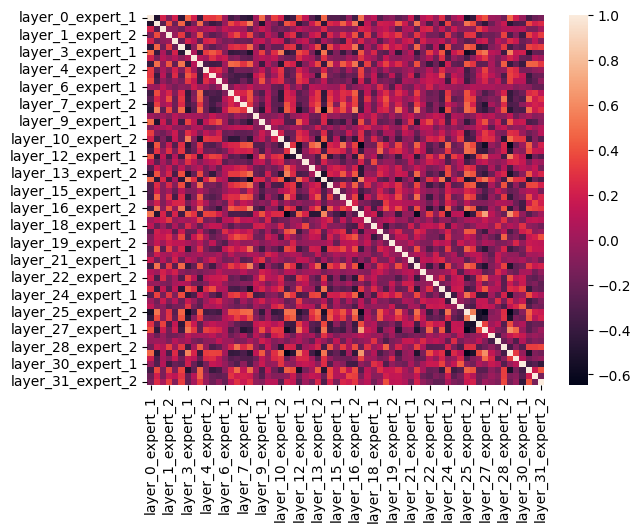

In [ ]:
%matplotlib inline
sns.heatmap(correlation_matrix)

In [ ]:
expert_cols = ['layer_0_expert_1', 'layer_0_expert_2', 'layer_1_expert_1', 'layer_1_expert_2', 'layer_2_expert_1', 'layer_2_expert_2', 'layer_3_expert_1', 'layer_3_expert_2', 'layer_4_expert_1', 'layer_4_expert_2', 'layer_5_expert_1', 'layer_5_expert_2', 'layer_6_expert_1', 'layer_6_expert_2', 'layer_7_expert_1', 'layer_7_expert_2', 'layer_8_expert_1', 'layer_8_expert_2', 'layer_9_expert_1', 'layer_9_expert_2', 'layer_10_expert_1', 'layer_10_expert_2', 'layer_11_expert_1', 'layer_11_expert_2', 'layer_12_expert_1', 'layer_12_expert_2', 'layer_13_expert_1', 'layer_13_expert_2', 'layer_14_expert_1', 'layer_14_expert_2', 'layer_15_expert_1', 'layer_15_expert_2', 'layer_16_expert_1', 'layer_16_expert_2', 'layer_17_expert_1', 'layer_17_expert_2', 'layer_18_expert_1', 'layer_18_expert_2', 'layer_19_expert_1', 'layer_19_expert_2', 'layer_20_expert_1', 'layer_20_expert_2', 'layer_21_expert_1', 'layer_21_expert_2', 'layer_22_expert_1', 'layer_22_expert_2', 'layer_23_expert_1', 'layer_23_expert_2', 'layer_24_expert_1', 'layer_24_expert_2', 'layer_25_expert_1', 'layer_25_expert_2', 'layer_26_expert_1', 'layer_26_expert_2', 'layer_27_expert_1', 'layer_27_expert_2', 'layer_28_expert_1', 'layer_28_expert_2', 'layer_29_expert_1', 'layer_29_expert_2', 'layer_30_expert_1', 'layer_30_expert_2', 'layer_31_expert_1', 'layer_31_expert_2']
top_expert_cols = [c for c in expert_cols if 'expert_1' in c]
top_expert_choice = df7[top_expert_cols]
top_expert_correlation_matrix = top_expert_choice.corr()
top_expert_correlation_matrix

layer_0_expert_1  layer_1_expert_1  layer_2_expert_1  \
layer_0_expert_1           1.000000          0.218051          0.205809   
layer_1_expert_1           0.218051          1.000000         -0.062526   
layer_2_expert_1           0.205809         -0.062526          1.000000   
layer_3_expert_1           0.462223          0.051088          0.220072   
layer_4_expert_1          -0.399620         -0.043548         -0.226543   
layer_5_expert_1           0.306517          0.110325          0.260436   
layer_6_expert_1           0.006987          0.142873         -0.152407   
layer_7_expert_1          -0.247488          0.055302         -0.197479   
layer_8_expert_1          -0.464364         -0.244490         -0.208850   
layer_9_expert_1           0.491333          0.175531          0.145653   
layer_10_expert_1          0.337303         -0.180026          0.174077   
layer_11_expert_1         -0.436968         -0.179041         -0.281609   
layer_12_expert_1          0.403504          0.129902          0.086136   
layer_13_expert_1         -0.261494         -0.040311         -0.171418   
layer_14_expert_1          0.466416          0.235976          0.042216   
layer_15_expert_1         -0.280902         -0.088310         -0.209205   
layer_16_expert_1         -0.053921         -0.120754          0.232042   
layer_17_expert_1          0.520380          0.226118          0.223394   
layer_18_expert_1          0.125789         -0.002518          0.058475   
layer_19_expert_1         -0.111476          0.151968         -0.029176   
layer_20_expert_1         -0.241000         -0.265257         -0.068269   
layer_21_expert_1          0.166889          0.087195          0.213216   
layer_22_expert_1          0.093641          0.212472          0.206075   
layer_23_expert_1         -0.027249         -0.106486          0.042045   
layer_24_expert_1         -0.268229         -0.148366         -0.120927   
layer_25_expert_1          0.127209         -0.056549         -0.146159   
layer_26_expert_1         -0.406775         -0.064087         -0.218480   
layer_27_expert_1          0.398766          0.181046          0.195214   
layer_28_expert_1         -0.027953         -0.014712          0.098278   
layer_29_expert_1          0.475931          0.092835          0.259837   
layer_30_expert_1         -0.023380          0.091104         -0.196096   
layer_31_expert_1         -0.191021         -0.130516          0.123083   

                   layer_3_expert_1  layer_4_expert_1  layer_5_expert_1  \
layer_0_expert_1           0.462223         -0.399620          0.306517   
layer_1_expert_1           0.051088         -0.043548          0.110325   
layer_2_expert_1           0.220072         -0.226543          0.260436   
layer_3_expert_1           1.000000         -0.420613          0.426442   
layer_4_expert_1          -0.420613          1.000000         -0.357968   
layer_5_expert_1           0.426442         -0.357968          1.000000   
layer_6_expert_1          -0.097804          0.014019         -0.150707   
layer_7_expert_1          -0.386845          0.449382         -0.360089   
layer_8_expert_1          -0.508379          0.458238         -0.422456   
layer_9_expert_1           0.338831         -0.380015          0.291230   
layer_10_expert_1          0.271838         -0.122909          0.010659   
layer_11_expert_1         -0.444747          0.284193         -0.291697   
layer_12_expert_1          0.391238         -0.420545          0.351896   
layer_13_expert_1         -0.133203          0.113243          0.021487   
layer_14_expert_1          0.513325         -0.402319          0.468399   
layer_15_expert_1         -0.117014          0.071556         -0.199995   
layer_16_expert_1         -0.152458          0.258392         -0.181794   
layer_17_expert_1          0.427960         -0.353646          0.331868   
layer_18_expert_1          0.241219         -0.232021          0.150530   
layer_19_expert_1         -0.276270        

<Axes: >

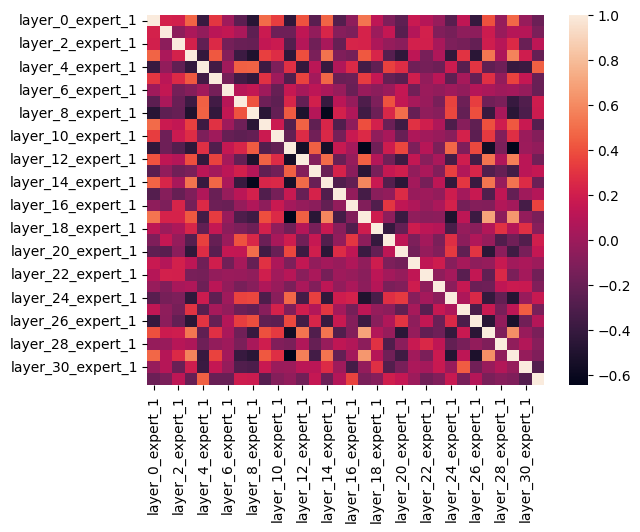

In [ ]:
%matplotlib inline
sns.heatmap(top_expert_correlation_matrix)

<Axes: >

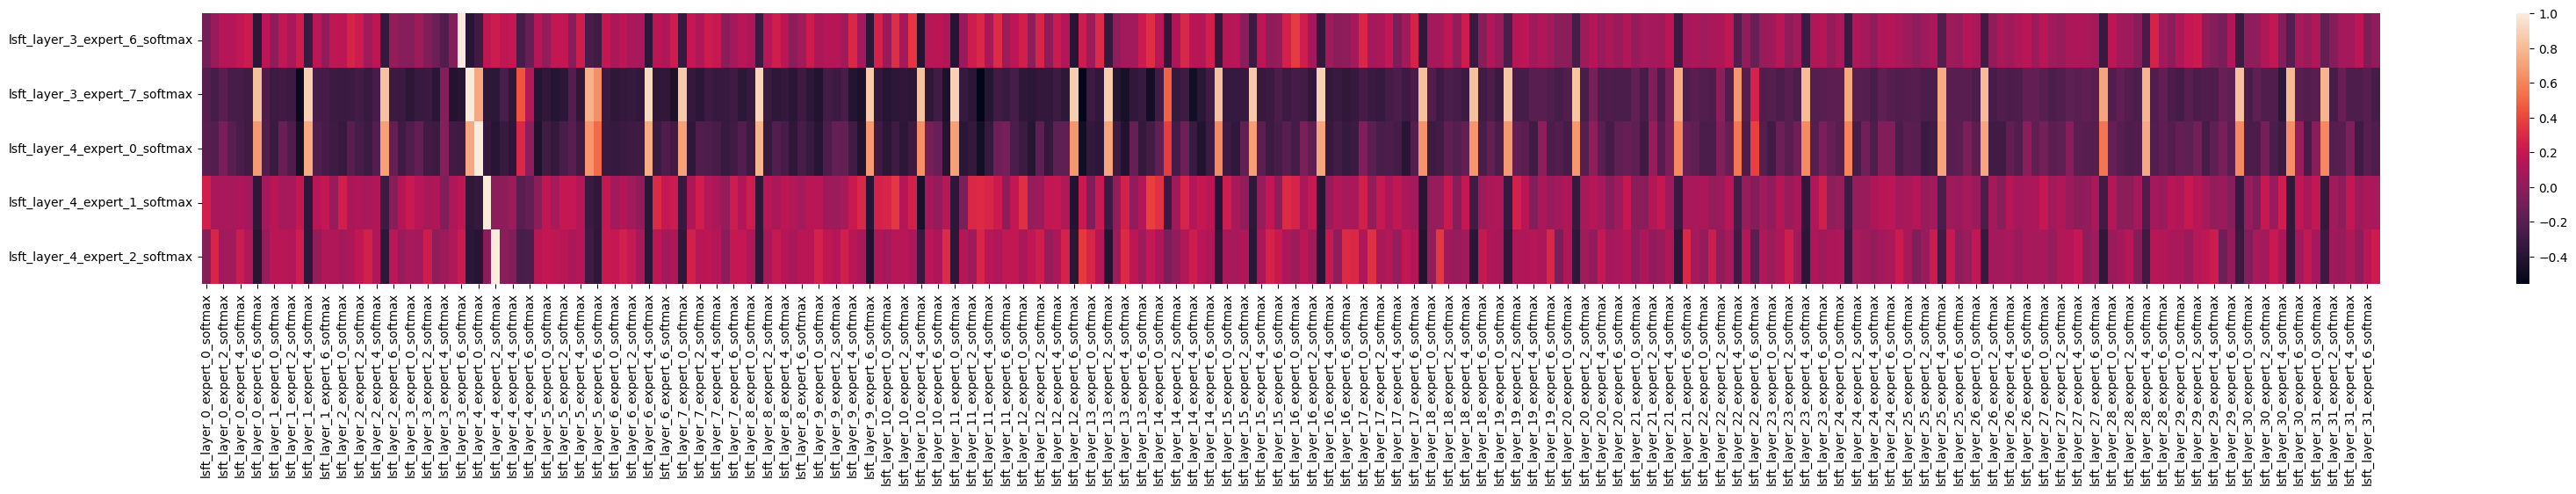

In [ ]:
prob_corr = sftmax_df.corr()
%matplotlib inline
from matplotlib import pyplot as plt


In [ ]:
## Full Chart

<Figure size 4000x400 with 0 Axes>

<Figure size 4000x400 with 0 Axes>

<Axes: >

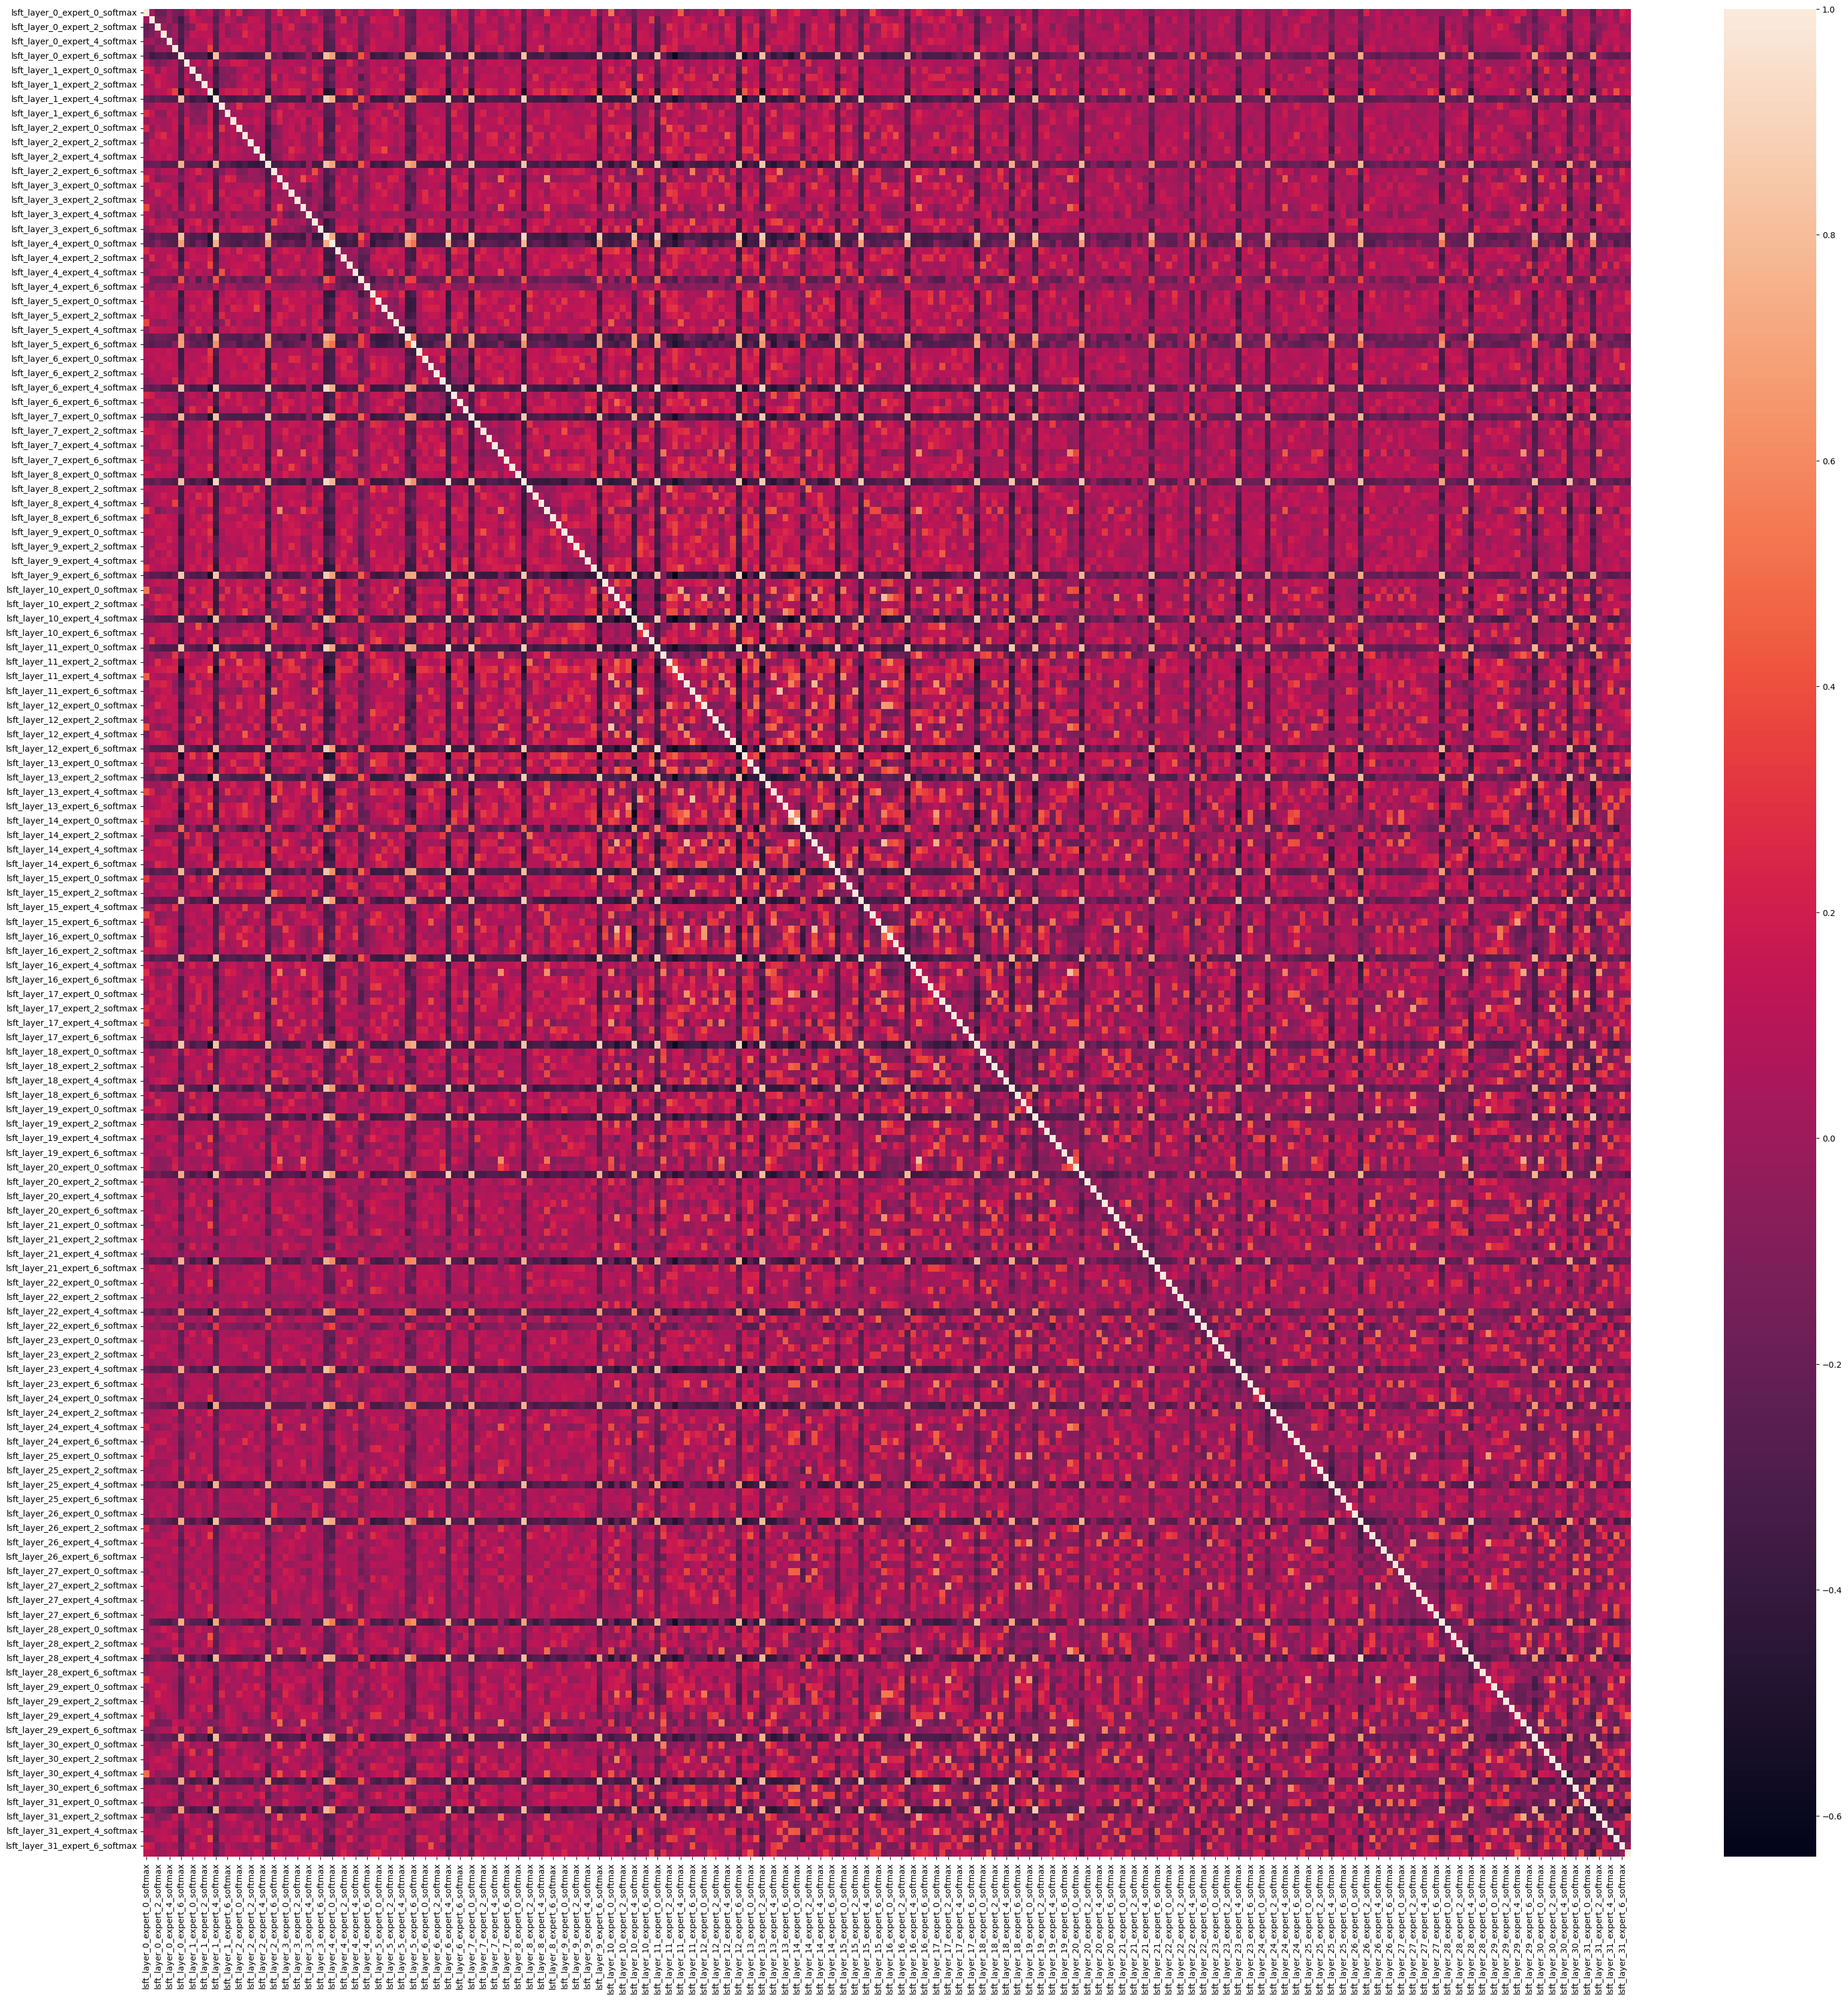

In [ ]:
## Full table
plt.figure(figsize=(40, 40))
sns.heatmap(prob_corr)


<Axes: >

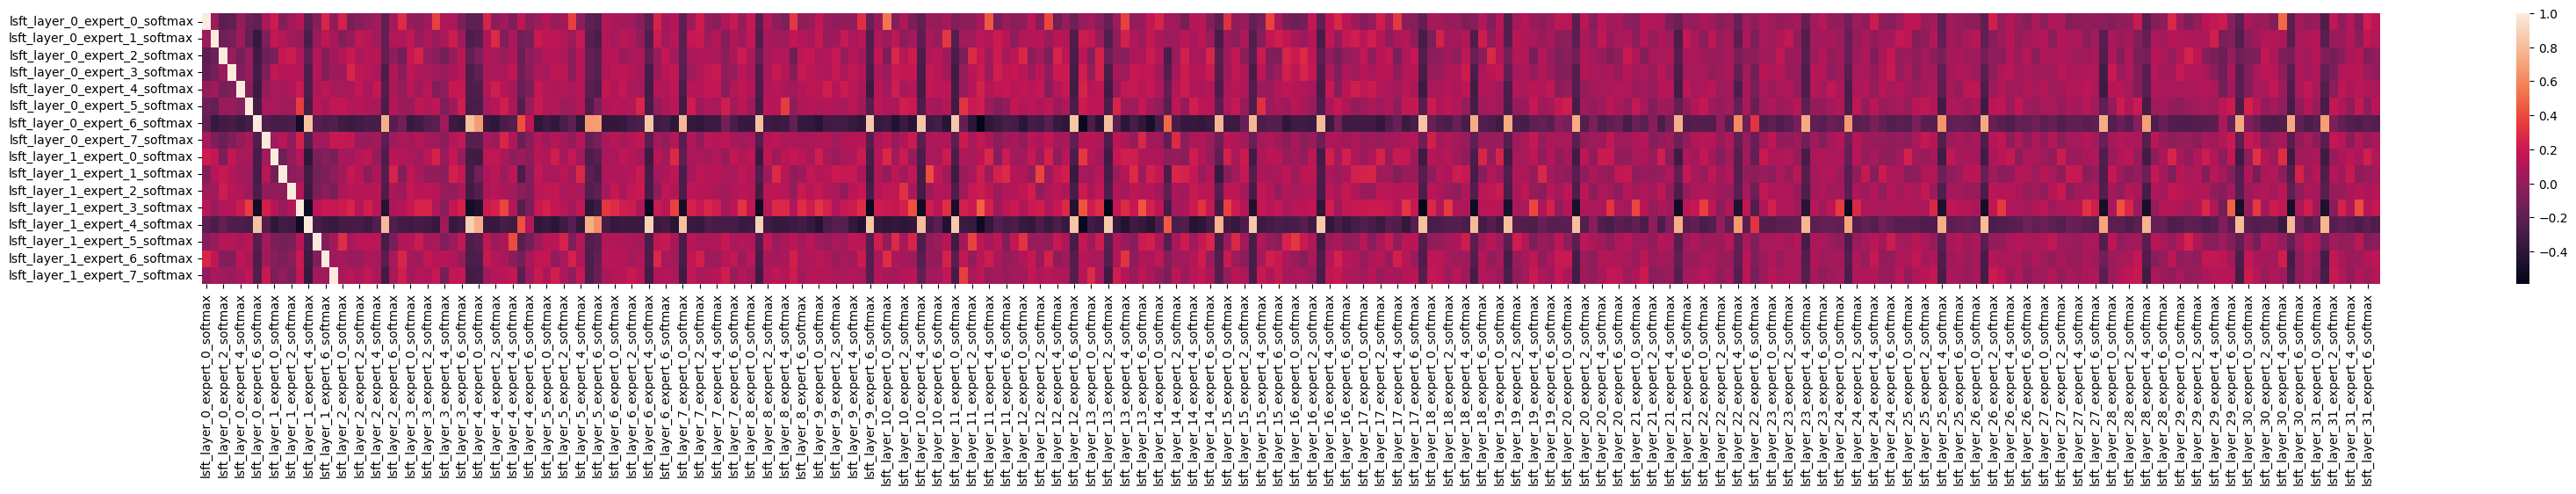

In [ ]:
plt.figure(figsize=(40, 4))
sns.heatmap(prob_corr.iloc[0:16, :])

<Axes: >

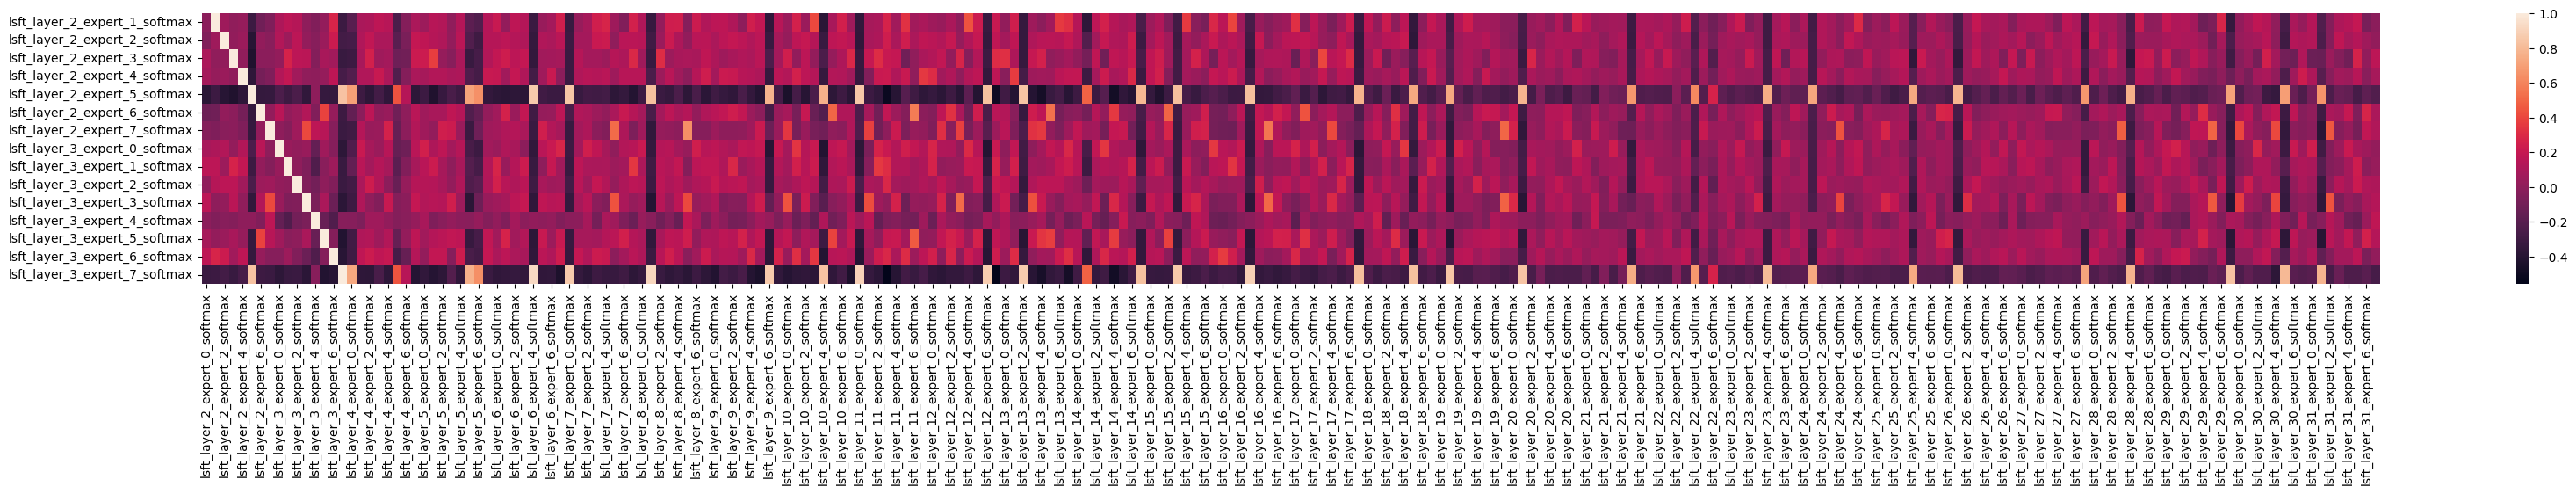

In [ ]:
plt.figure(figsize=(40, 4))
sns.heatmap(prob_corr.iloc[17:32, 16:])

<Axes: >

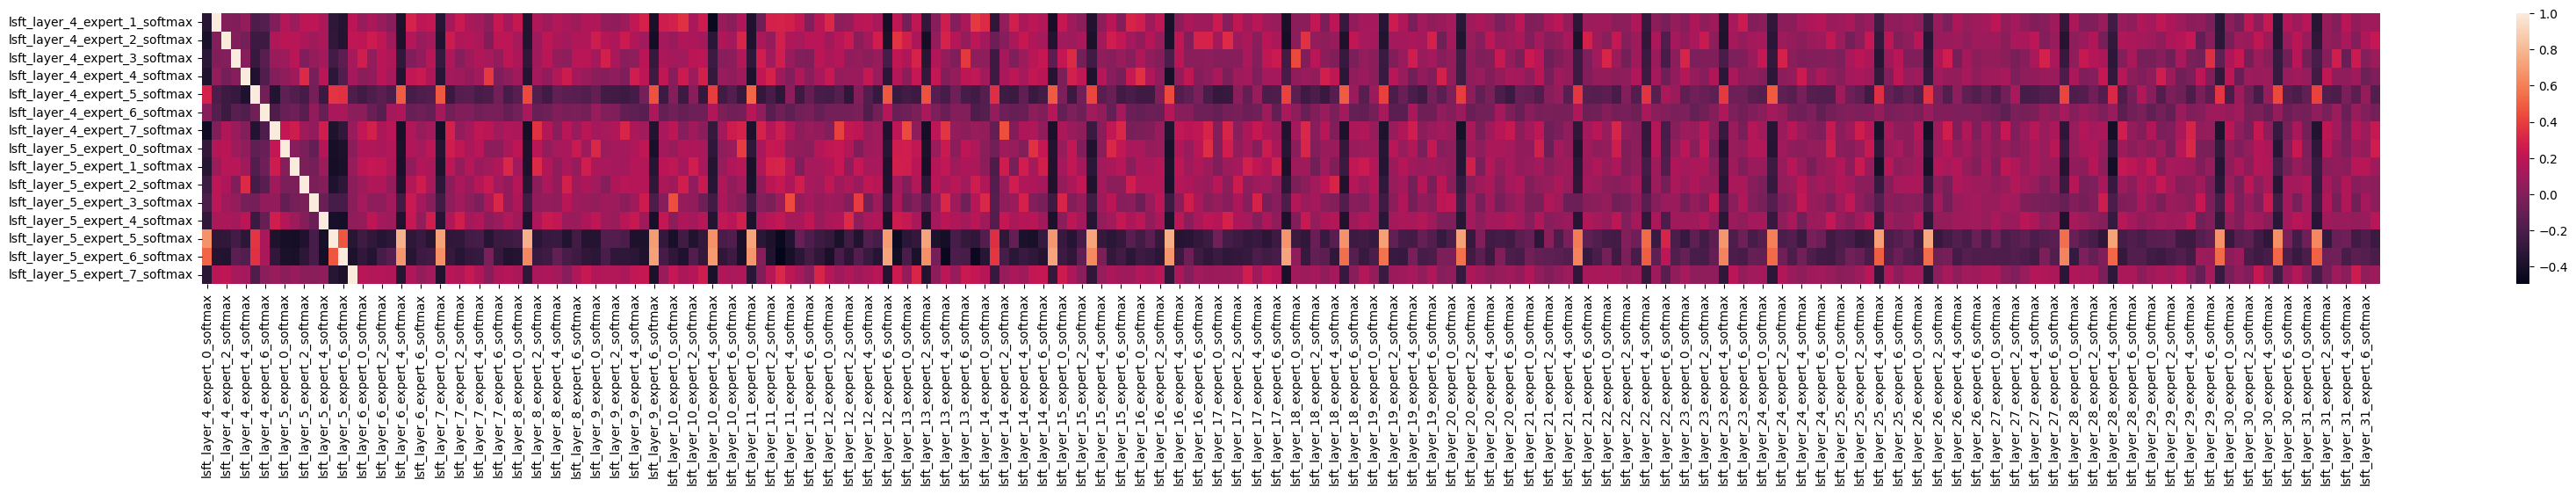

In [ ]:
plt.figure(figsize=(40, 4))
sns.heatmap(prob_corr.iloc[33:48, 32:])

<Axes: >

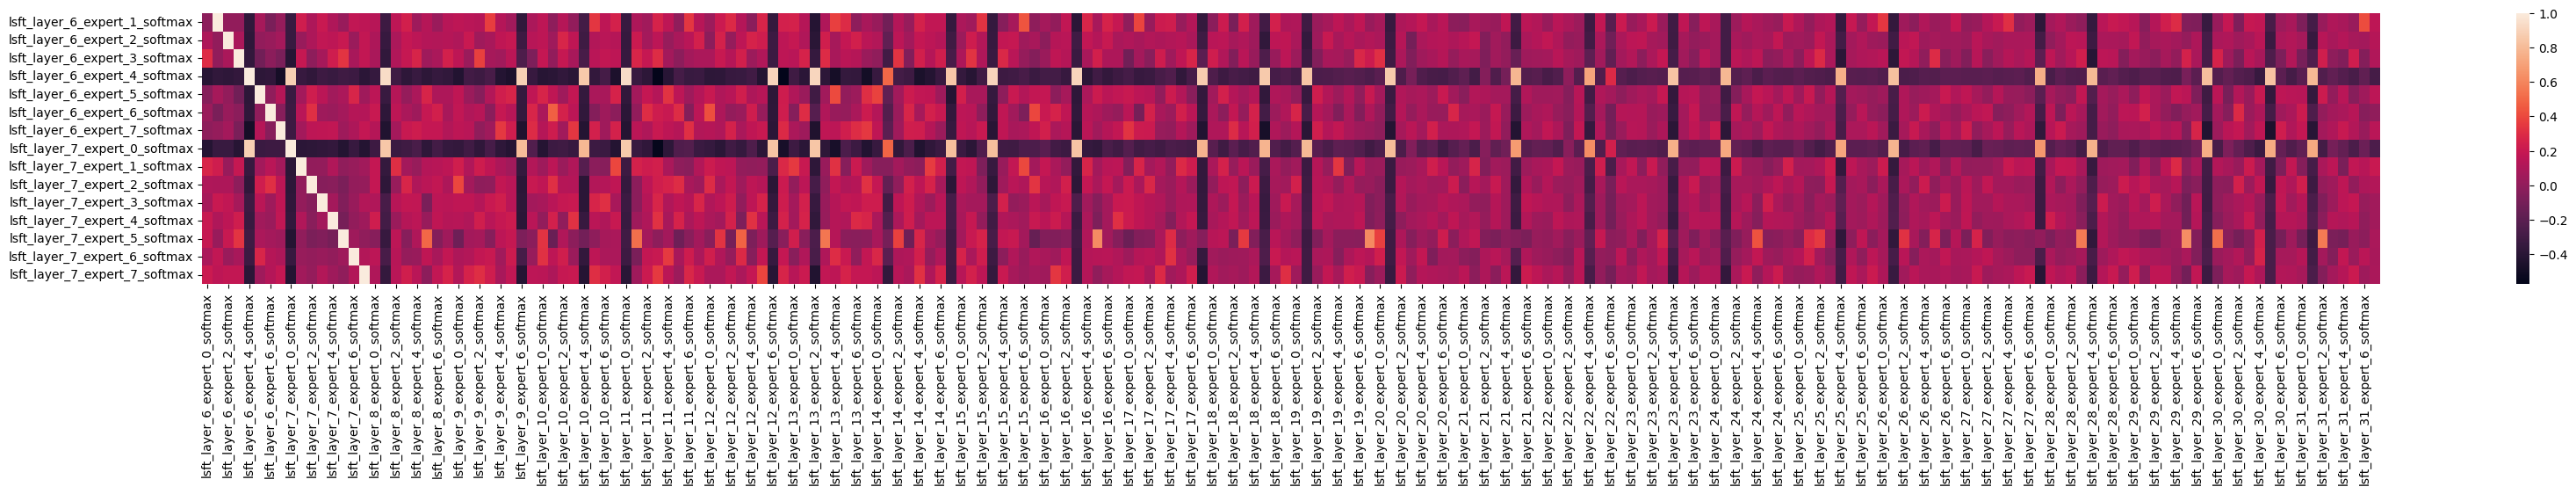

In [ ]:
plt.figure(figsize=(40, 4))
sns.heatmap(prob_corr.iloc[49:64, 48:])

In [ ]:
sftmax_df.columns[32]
prob_corr['lsft_layer_3_expert_7_softmax']['lsft_layer_4_expert_0_softmax']

0.7269922687207347

## Let's try regression
x: Layer 0-3, y: Layer 7-10



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

(1302, 32)
(434, 32)
Layer: lsft_layer_7_expert_0_softmax | Accuracy: 0.8234591826172636
(1302, 32)
(434, 32)
Layer: lsft_layer_7_expert_1_softmax | Accuracy: 0.15754848956418233
(1302, 32)
(434, 32)
Layer: lsft_layer_7_expert_2_softmax | Accuracy: 0.15511849625299867
(1302, 32)
(434, 32)
Layer: lsft_layer_7_expert_3_softmax | Accuracy: 0.1817982184842999
(1302, 32)
(434, 32)
Layer: lsft_layer_7_expert_4_softmax | Accuracy: 0.16000051514095393
(1302, 32)
(434, 32)
Layer: lsft_layer_7_expert_5_softmax | Accuracy: 0.42687816288674807
(1302, 32)
(434, 32)
Layer: lsft_layer_7_expert_6_softmax | Accuracy: 0.14412924260640736
(1302, 32)
(434, 32)
Layer: lsft_layer_7_expert_7_softmax | Accuracy: 0.3047952974014242
(1302, 32)
(434, 32)
Layer: lsft_layer_8_expert_0_softmax | Accuracy: 0.11154551448318262
(1302, 32)
(434, 32)
Layer: lsft_layer_8_expert_1_softmax | Accuracy: 0.892254506384496
(1302, 32)
(434, 32)
Layer: lsft_layer_8_expert_2_softmax | Accuracy: 0.21044929877346108
(1302, 32)
(434

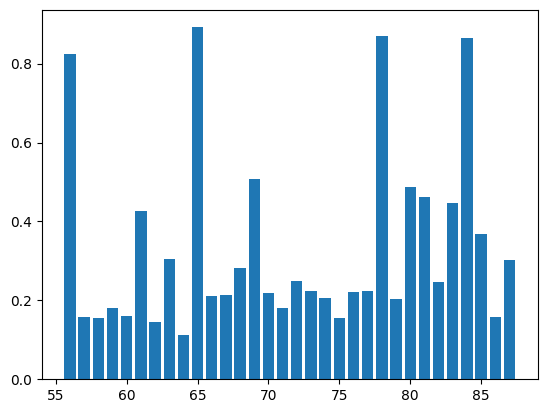

In [ ]:
labels = []
accs = []

for i in range(56, 88):
  target_col = sftmax_df.columns[i]

  # Split the dataset
  X_train, X_test, y_train, y_test = train_test_split(sftmax_df[sftmax_df.columns[:32]], sftmax_df[sftmax_df.columns[i]], random_state=0)

  print (X_train.shape)
  print (X_test.shape)

  #print (X_train)

  # Train the model
  clf = LinearRegression()
  clf.fit(X_train, y_train)

  accuracy = clf.score(X_test, y_test)

  labels.append(target_col)
  accs.append(accuracy)

  print(f"Layer: {target_col} | Accuracy: {accuracy}")
  #print("Accuracy:", clf.score(X_test, y_test))

plt.bar(range(56, 88), accs)
plt.show()

In [ ]:
labels = []
accs = []

for i in range(56, 88):
  target_col = sftmax_df.columns[i]

  # Split the dataset
  X_train, X_test, y_train, y_test = train_test_split(sftmax_df[sftmax_df.columns[:32]], sftmax_df[sftmax_df.columns[i]], random_state=0)

  print (X_train.shape)
  print (X_test.shape)

  #print (X_train)

  # Train the model
  clf = LinearRegression()
  clf.fit(X_train, y_train)

  accuracy = clf.score(X_test, y_test)

  labels.append(target_col)
  accs.append(accuracy)

  print(f"Layer: {target_col} | Accuracy: {accuracy}")
  #print("Accuracy:", clf.score(X_test, y_test))

plt.bar(range(56, 88), accs)
plt.show()

(1302, 32)
(1302, 50)
(2604, 32)
(2604, 1)
Accuracy: 0.6152073732718893
(1302, 32)
(1302, 50)
(2604, 32)
(2604, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.6221198156682027
(1302, 32)
(1302, 50)
(2604, 32)
(2604, 1)
Accuracy: 0.6059907834101382
(1302, 32)
(1302, 50)
(2604, 32)
(2604, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Accuracy: 0.7488479262672811
(1302, 32)
(1302, 50)
(2604, 32)
(2604, 1)
Accuracy: 0.7580645161290323
(1302, 32)
(1302, 50)
(2604, 32)
(2604, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Accuracy: 0.695852534562212
(1302, 32)
(1302, 50)
(2604, 32)
(2604, 1)
Accuracy: 0.7004608294930875
(1302, 32)
(1302, 50)
(2604, 32)
(2604, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Accuracy: 0.7235023041474654
(1302, 32)
(1302, 50)
(2604, 32)
(2604, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7096774193548387
(1302, 32)
(1302, 50)
(2604, 32)
(2604, 1)
Accuracy: 0.6129032258064516
(1302, 32)
(1302, 50)
(2604, 32)
(2604, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6682027649769585
(1302, 32)
(1302, 50)
(2604, 32)
(2604, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6543778801843319
(1302, 32)
(1302, 50)
(2604, 32)
(2604, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6036866359447005
(1302, 32)
(1302, 50)
(2604, 32)
(2604, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.5691244239631337
(1302, 32)
(1302, 50)
(2604, 32)
(2604, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.5184331797235023
(1302, 32)
(1302, 50)
(2604, 32)
(2604, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.5299539170506913
(1302, 32)
(1302, 50)
(2604, 32)
(2604, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.5898617511520737
(1302, 32)
(1302, 50)
(2604, 32)
(2604, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.5714285714285714
(1302, 32)
(1302, 50)
(2604, 32)
(2604, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.5645161290322581
(1302, 32)
(1302, 50)
(2604, 32)
(2604, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.5714285714285714
(1302, 32)
(1302, 50)
(2604, 32)
(2604, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.5737327188940092
(1302, 32)
(1302, 50)
(2604, 32)
(2604, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6129032258064516
(1302, 32)
(1302, 50)
(2604, 32)
(2604, 1)
Accuracy: 0.6728110599078341
(1302, 32)
(1302, 50)
(2604, 32)
(2604, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.684331797235023
(1302, 32)
(1302, 50)
(2604, 32)
(2604, 1)
Accuracy: 0.6336405529953917


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


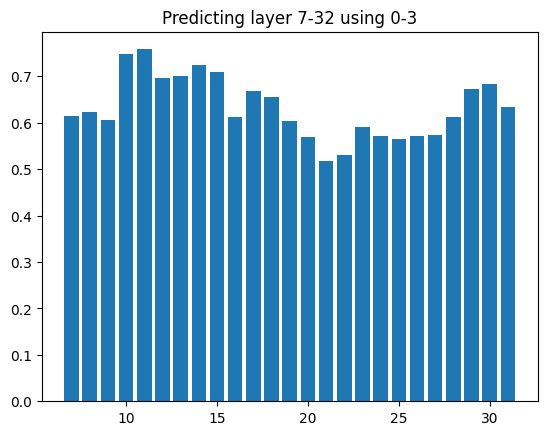

In [ ]:
target_columns = ['layer_7_expert_1', 'layer_7_expert_2', 'layer_8_expert_1', 'layer_8_expert_2', 'layer_9_expert_1', 'layer_9_expert_2', 'layer_10_expert_1', 'layer_10_expert_2', 'layer_11_expert_1', 'layer_11_expert_2', 'layer_12_expert_1', 'layer_12_expert_2', 'layer_13_expert_1', 'layer_13_expert_2', 'layer_14_expert_1', 'layer_14_expert_2', 'layer_15_expert_1', 'layer_15_expert_2', 'layer_16_expert_1', 'layer_16_expert_2', 'layer_17_expert_1', 'layer_17_expert_2', 'layer_18_expert_1', 'layer_18_expert_2', 'layer_19_expert_1', 'layer_19_expert_2', 'layer_20_expert_1', 'layer_20_expert_2', 'layer_21_expert_1', 'layer_21_expert_2', 'layer_22_expert_1', 'layer_22_expert_2', 'layer_23_expert_1', 'layer_23_expert_2', 'layer_24_expert_1', 'layer_24_expert_2', 'layer_25_expert_1', 'layer_25_expert_2', 'layer_26_expert_1', 'layer_26_expert_2', 'layer_27_expert_1', 'layer_27_expert_2', 'layer_28_expert_1', 'layer_28_expert_2', 'layer_29_expert_1', 'layer_29_expert_2', 'layer_30_expert_1', 'layer_30_expert_2', 'layer_31_expert_1', 'layer_31_expert_2']
regression_dataset = add_columns(df7, add_individual_softmax_cols)
X = regression_dataset[['lsft_layer_0_expert_0_softmax', 'lsft_layer_0_expert_1_softmax', 'lsft_layer_0_expert_2_softmax', 'lsft_layer_0_expert_3_softmax', 'lsft_layer_0_expert_4_softmax', 'lsft_layer_0_expert_5_softmax', 'lsft_layer_0_expert_6_softmax', 'lsft_layer_0_expert_7_softmax', 'lsft_layer_1_expert_0_softmax', 'lsft_layer_1_expert_1_softmax',
'lsft_layer_1_expert_2_softmax',
'lsft_layer_1_expert_3_softmax',
'lsft_layer_1_expert_4_softmax',
'lsft_layer_1_expert_5_softmax',
'lsft_layer_1_expert_6_softmax',
'lsft_layer_1_expert_7_softmax',
'lsft_layer_2_expert_0_softmax',
'lsft_layer_2_expert_1_softmax',
'lsft_layer_2_expert_2_softmax',
'lsft_layer_2_expert_3_softmax',
'lsft_layer_2_expert_4_softmax',
'lsft_layer_2_expert_5_softmax',
'lsft_layer_2_expert_6_softmax',
'lsft_layer_2_expert_7_softmax',
'lsft_layer_3_expert_0_softmax',
'lsft_layer_3_expert_1_softmax',
'lsft_layer_3_expert_2_softmax',
'lsft_layer_3_expert_3_softmax',
'lsft_layer_3_expert_4_softmax',
'lsft_layer_3_expert_5_softmax',
'lsft_layer_3_expert_6_softmax',
'lsft_layer_3_expert_7_softmax']]

Y = regression_dataset[['layer_7_expert_1', 'layer_7_expert_2', 'layer_8_expert_1', 'layer_8_expert_2', 'layer_9_expert_1', 'layer_9_expert_2', 'layer_10_expert_1', 'layer_10_expert_2', 'layer_11_expert_1', 'layer_11_expert_2', 'layer_12_expert_1', 'layer_12_expert_2', 'layer_13_expert_1', 'layer_13_expert_2', 'layer_14_expert_1', 'layer_14_expert_2', 'layer_15_expert_1', 'layer_15_expert_2', 'layer_16_expert_1', 'layer_16_expert_2', 'layer_17_expert_1', 'layer_17_expert_2', 'layer_18_expert_1', 'layer_18_expert_2', 'layer_19_expert_1', 'layer_19_expert_2', 'layer_20_expert_1', 'layer_20_expert_2', 'layer_21_expert_1', 'layer_21_expert_2', 'layer_22_expert_1', 'layer_22_expert_2', 'layer_23_expert_1', 'layer_23_expert_2', 'layer_24_expert_1', 'layer_24_expert_2', 'layer_25_expert_1', 'layer_25_expert_2', 'layer_26_expert_1', 'layer_26_expert_2', 'layer_27_expert_1', 'layer_27_expert_2', 'layer_28_expert_1', 'layer_28_expert_2', 'layer_29_expert_1', 'layer_29_expert_2', 'layer_30_expert_1', 'layer_30_expert_2', 'layer_31_expert_1', 'layer_31_expert_2']]

accs = []

for i in range(7, 32):
  target_col = f"layer_{i}_expert_1"
  X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)
  target_col_2 = target_col.replace('expert_1', 'expert_2')

  # Train the model
  clf = LogisticRegression()
  aug_xtrain = pd.concat([X_train, X_train], axis=0)
  aug_ytrain = pd.concat([y_train[[target_col]].rename(columns={target_col: "label"}), y_train[[target_col_2]].rename(columns={target_col_2: "label"})], axis=0)

  print (X_train.shape)
  print (y_train.shape)
  print (aug_xtrain.shape)
  print (aug_ytrain.shape)

  clf = LogisticRegression()
  clf = clf.fit(aug_xtrain, aug_ytrain)

  y_preds = clf.predict(X_test)

  acc = (y_test[[target_col]].to_numpy().reshape(-1) == y_preds).sum()
  acc += (y_test[[target_col_2]].to_numpy().reshape(-1) == y_preds).sum()

  acc = acc / y_test.shape[0]

  accs.append(acc)
  print (f"Accuracy: {acc}")

# Show plot
plt.title("Predicting layer 7-32 using 0-3")
plt.bar(range(7, 32), accs)
plt.show()

In [ ]:
print (y_test[['layer_7_expert_1']].to_numpy().reshape(-1).shape)
print (y_preds.shape)

print ((y_test[['layer_7_expert_1']].to_numpy().reshape(-1) == y_preds).sum())

(434,)
(434,)
153


In [ ]:
print (sftmax_df.columns[:32])
print (sftmax_df.columns[7 * 8: 11 * 8])


Index(['lsft_layer_0_expert_0_softmax', 'lsft_layer_0_expert_1_softmax',
       'lsft_layer_0_expert_2_softmax', 'lsft_layer_0_expert_3_softmax',
       'lsft_layer_0_expert_4_softmax', 'lsft_layer_0_expert_5_softmax',
       'lsft_layer_0_expert_6_softmax', 'lsft_layer_0_expert_7_softmax',
       'lsft_layer_1_expert_0_softmax', 'lsft_layer_1_expert_1_softmax',
       'lsft_layer_1_expert_2_softmax', 'lsft_layer_1_expert_3_softmax',
       'lsft_layer_1_expert_4_softmax', 'lsft_layer_1_expert_5_softmax',
       'lsft_layer_1_expert_6_softmax', 'lsft_layer_1_expert_7_softmax',
       'lsft_layer_2_expert_0_softmax', 'lsft_layer_2_expert_1_softmax',
       'lsft_layer_2_expert_2_softmax', 'lsft_layer_2_expert_3_softmax',
       'lsft_layer_2_expert_4_softmax', 'lsft_layer_2_expert_5_softmax',
       'lsft_layer_2_expert_6_softmax', 'lsft_layer_2_expert_7_softmax',
       'lsft_layer_3_expert_0_softmax', 'lsft_layer_3_expert_1_softmax',
       'lsft_layer_3_expert_2_softmax', 'lsft_layer

## Scratch cells


In [ ]:
df5.iloc[0]

In [ ]:

print (df5.iloc[0][-1].shape)

torch.Size([32, 8])


In [ ]:

df4.iloc[0]

id                                   a4942dd663020ca54575471657a0af38d82897d6
num_output_tokens                                                          36
sequences                   [tensor(1, device='cuda:0'), tensor(733, devic...
router_prefill              [[[tensor(-0.3574, device='cuda:0', dtype=torc...
router_decode               [1, [[tensor([-0.0400, -1.6016,  0.4473, -0.75...
router_activation           [[[tensor(0.6367, device='cuda:0', dtype=torch...
activations_by_token_num    (0, [[tensor(0.6367, device='cuda:0', dtype=to...
Name: 0, dtype: object

In [ ]:

df3.iloc[0][-1]

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
tmp = torch.cat((full_df.iloc[0][3][:, -1:, :], *full_df.iloc[0][4][1::2]), axis=1)
print(tmp.shape)

torch.Size([32, 36, 8])


In [ ]:
tmp[:, 0, :].shape

torch.Size([32, 8])

In [ ]:
print (tmp[:, 0, :])

sft = nn.Softmax(dim=2)

s = sft(tmp)
print (torch.sum(s[:, 0, :], dim=1))

In [ ]:
full_df.iloc[0]

In [ ]:
full_df.iloc[0][3][:, -1:, :].shape

In [ ]:
full_df

In [ ]:
full_df.columns